# Xây dựng mô hình đánh giá điểm tín dụng của khách hàng
Xây dựng mô hình để đánh giá điểm tín dụng của khách hàng dựa trên thông tin giao dịch và các thông tin cá nhân.
Các khách hàng sẽ được phân loại thành hai nhóm:
- Default: Khách hàng có khả năng vỡ nợ.
- Non-default: Khách hàng không có khả năng vỡ nợ.
# Phạm vi thời gian:
Dữ liệu giao dịch và hồ sơ tín dụng trong 6 tháng gần nhất.
Số lượng dữ liệu: 30,000 mẫu.
# Biến số quan trọng
1. Biến mục tiêu (Y - Output)
Default payment next month:
- 1: Vỡ nợ.
- 0: Không vỡ nợ.
2. Biến đầu vào (X - Features)
- LIMIT_BAL: Hạn mức tín dụng được cấp.
- SEX: Giới tính khách hàng (1: Nam, 0: Nữ).
- EDUCATION: Trình độ học vấn (1: Cao học, 2: Đại học, 3: Trung học, 4: Khác).
- MARRIAGE: Tình trạng hôn nhân (1: Có gia đình, 2: Chưa lập gia đình, 3: Khác).
- AGE: Độ tuổi.
- PAY0, PAY2, PAY3, PAY4, PAY5, PAY6:
Trạng thái thanh toán tín dụng trong 6 tháng gần nhất (-1: Thanh toán đúng hạn, >=0: Số tháng trễ hạn).
- BILL_AMT_1 → BILL_AMT_6:
Số tiền sao kê theo từng tháng trong 6 tháng gần nhất.
- PAY_AMT_1 → PAY_AMT_6:
Lịch sử thanh toán tín dụng trong 6 tháng gần nhất.

# Tải file dữ liệu

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
data = pd.read_csv('credit_card.csv')
data

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,29996,220000.0,1,3,1,39,0,0,0,0,...,88004.0,31237.0,15980.0,8500.0,20000.0,5003.0,3047.0,5000.0,1000.0,0
29996,29997,150000.0,1,3,2,43,-1,-1,-1,-1,...,8979.0,5190.0,0.0,1837.0,3526.0,8998.0,129.0,0.0,0.0,0
29997,29998,30000.0,1,2,2,37,4,3,2,-1,...,20878.0,20582.0,19357.0,0.0,0.0,22000.0,4200.0,2000.0,3100.0,1
29998,29999,80000.0,1,3,1,41,1,-1,0,0,...,52774.0,11855.0,48944.0,85900.0,3409.0,1178.0,1926.0,52964.0,1804.0,1


# Thống kê mô tả dữ liệu

In [ ]:
data.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


**Hạn mức tín dụng (LIMIT_BAL)**
- Trung bình: 167.484  
- Khoảng dao động: 10.000 → 1.000.000  
- Phân bố: 50% khách hàng có hạn mức dưới 140.000, cho thấy đa số khách hàng có hạn mức trung bình.

**Giới tính (SEX)**
- Trung bình: 1.60  
- Nhận xét: Tỷ lệ nữ nhiều hơn nam (~60% khách hàng là nữ).

**Trình độ học vấn (EDUCATION)**
- Mã hóa dữ liệu:  
  - 1 = Cao học  
  - 2 = Đại học  
  - 3 = Trung học  
  - 4+ = Khác  
- Trung bình: 1.85, nghĩa là phần lớn khách hàng có trình độ đại học trở lên.
- Giá trị 6 và 0 không hợp lệ.

**Tình trạng hôn nhân (MARRIAGE)**
- Mã hóa dữ liệu:  
  - 1 = Đã kết hôn  
  - 2 = Độc thân  
  - 3 = Khác  
- Trung bình: 1.55, tức là số lượng khách hàng đã kết hôn và độc thân gần bằng nhau.
- Giá trị 0 không hợp lệ

**Độ tuổi (AGE)**
- Tuổi trung bình: 35.49  
- Phân bố tuổi khách hàng:  
  - 25% khách hàng dưới 28 tuổi.  
  - 50% khách hàng dưới 34 tuổi.  
  - 75% khách hàng dưới 41 tuổi.  

**Lịch sử thanh toán (PAY_0 → PAY_6)**
- Các giá trị thể hiện trạng thái thanh toán trong 6 tháng gần nhất:
  - -2: Thanh toán đúng hạn sớm.
  - -1: Thanh toán đúng hạn.
  - 0: Đã thanh toán nhưng có trễ hạn nhẹ.
  - lớn hơn 0: Số tháng trễ hạn.
- Nhận xét:
  - Phần lớn khách hàng không trễ hạn hoặc chỉ trễ hạn nhẹ.
  - Một số khách hàng có mức trễ hạn cao nhất là 8 tháng, cho thấy rủi ro vỡ nợ cao.

**Số dư sao kê (BILL_AMT_1 → BILL_AMT_6)**
- Trung bình: 40.000 - 43.000  
- Có giá trị âm, cho thấy một số khách hàng có khoản tín dụng âm hoặc vượt quá hạn mức.

**Số tiền thanh toán (PAY_AMT_1 → PAY_AMT_6)**
- Trung bình: 5000 - 6000/tháng  
- Một số khách hàng thanh toán số tiền cực lớn (hàng trăm triệu/tháng).  
- 50% khách hàng thanh toán dưới 2100/tháng, cho thấy nhiều khách hàng chỉ trả khoản nhỏ.

**Khả năng vỡ nợ (default.payment.next.month)**
- Trung bình: 0.2212  
  - 22.12% khách hàng có nguy cơ vỡ nợ.
  - 77.88% khách hàng không vỡ nợ.
- Dữ liệu không cân bằng.

In [ ]:
data.reset_index(drop=True, inplace=True)
print(data.head(5))
print(data.columns)

   ID  LIMIT_BAL  SEX  EDUCATION  MARRIAGE  AGE  PAY_0  PAY_2  PAY_3  PAY_4  \
0   1    20000.0    2          2         1   24      2      2     -1     -1   
1   2   120000.0    2          2         2   26     -1      2      0      0   
2   3    90000.0    2          2         2   34      0      0      0      0   
3   4    50000.0    2          2         1   37      0      0      0      0   
4   5    50000.0    1          2         1   57     -1      0     -1      0   

   ...  BILL_AMT4  BILL_AMT5  BILL_AMT6  PAY_AMT1  PAY_AMT2  PAY_AMT3  \
0  ...        0.0        0.0        0.0       0.0     689.0       0.0   
1  ...     3272.0     3455.0     3261.0       0.0    1000.0    1000.0   
2  ...    14331.0    14948.0    15549.0    1518.0    1500.0    1000.0   
3  ...    28314.0    28959.0    29547.0    2000.0    2019.0    1200.0   
4  ...    20940.0    19146.0    19131.0    2000.0   36681.0   10000.0   

   PAY_AMT4  PAY_AMT5  PAY_AMT6  default.payment.next.month  
0       0.0       0.0   

# Làm sạch dữ liệu

In [ ]:
data[['SEX', 'EDUCATION','MARRIAGE']].agg(pd.Series.value_counts, dropna=False)

,SEX,EDUCATION,MARRIAGE
0,NaN,14,54.0
1,11888.0,10585,13659.0
2,18112.0,14030,15964.0
3,NaN,4917,323.0
4,NaN,123,NaN
5,NaN,280,NaN
6,NaN,51,NaN


In [ ]:
data['SEX'].value_counts(dropna=False)

SEX
2    18112
1    11888
Name: count, dtype: int64

In [ ]:
# Chuẩn hóa cột SEX: 2 → 0 (Nữ), 1 giữ nguyên (Nam)
data['SEX'] = data['SEX'].replace({2: 0})

# Kiểm tra lại kết quả
print(data['SEX'].value_counts())

SEX
0    18112
1    11888
Name: count, dtype: int64


In [ ]:
# Gom các giá trị không hợp lệ về 3
data['MARRIAGE'] = data['MARRIAGE'].replace({0: 3})
# Kiểm tra lại
print(data['MARRIAGE'].value_counts())

MARRIAGE
2    15964
1    13659
3      377
Name: count, dtype: int64


In [ ]:
# Gom các giá trị không hợp lệ về 4
data['EDUCATION'] = data['EDUCATION'].replace({5: 4, 6: 4, 0: 4})
# Kiểm tra lại
print(data['EDUCATION'].value_counts())

EDUCATION
2    14030
1    10585
3     4917
4      468
Name: count, dtype: int64


In [ ]:
data.columns

Index(['ID', 'LIMIT_BAL', 'SEX', 'EDUCATION', 'MARRIAGE', 'AGE', 'PAY_0',
       'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6', 'BILL_AMT1', 'BILL_AMT2',
       'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6', 'PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6',
       'default.payment.next.month'],
      dtype='object')

# Phân tích tương quan giữa các đặc trưng trong dữ liệu

Phân phối của biến mục tiêu:
default.payment.next.month
0    23364
1     6636
Name: count, dtype: int64

Tỷ lệ phần trăm của mỗi nhóm:
default.payment.next.month
0    77.88
1    22.12
Name: count, dtype: float64


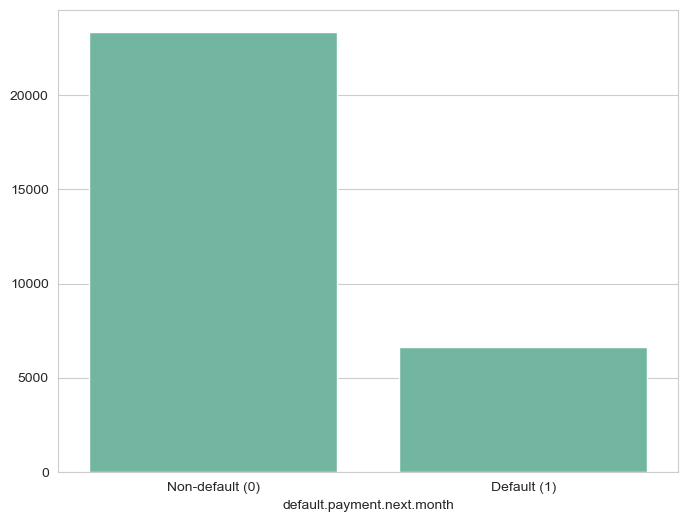

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
# Kiểm tra phân phối của biến mục tiêu
target = 'default.payment.next.month'
target_distribution = data[target].value_counts()

# Tính tỷ lệ phần trăm mỗi nhóm
target_percentage = (target_distribution / len(data)) * 100

# In kết quả
print("Phân phối của biến mục tiêu:")
print(target_distribution)
print("\nTỷ lệ phần trăm của mỗi nhóm:")
print(target_percentage)

# Biểu đồ trực quan
plt.figure(figsize=(8, 6))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.xticks([0, 1], ['Non-default (0)', 'Default (1)'])
plt.show()

Accuracy cũng không phải là một metric tốt để đánh giá mô hình
Các thước đo tốt hơn là:
Precision, Recall, F1-score, và ROC-AUC.

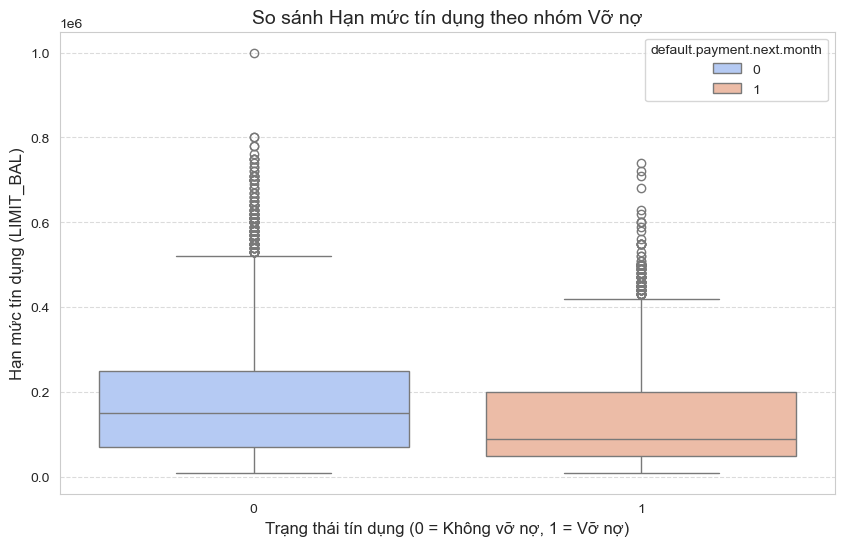

In [ ]:
# Tạo boxplot với hue
plt.figure(figsize=(10, 6))
sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=data, hue="default.payment.next.month", palette="coolwarm")

# Thêm nhãn và tiêu đề cho đồ thị
plt.xlabel("Trạng thái tín dụng (0 = Không vỡ nợ, 1 = Vỡ nợ)", fontsize=12)
plt.ylabel("Hạn mức tín dụng (LIMIT_BAL)", fontsize=12)
plt.title("So sánh Hạn mức tín dụng theo nhóm Vỡ nợ", fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Nhóm không vỡ nợ (0) có hạn mức tín dụng cao hơn nhóm vỡ nợ (1). Phân phối của nhóm vỡ nợ tập trung nhiều hơn ở hạn mức tín dụng thấp (50.000 - 150.000). Nhiều khách hàng có hạn mức rất cao (trên 500.000 - 1.000.000), nhưng họ không phải là số đông. Phần lớn khách hàng vỡ nợ có hạn mức dưới 150.000. Trong khi nhóm không vỡ nợ có hạn mức cao hơn (200.000 - 300.000).

In [ ]:
from scipy.stats import ttest_ind, mannwhitneyu

# Phân tách dữ liệu theo nhóm
non_default = data[data['default.payment.next.month'] == 0]['LIMIT_BAL']
default = data[data['default.payment.next.month'] == 1]['LIMIT_BAL']

# Kiểm định t-test (nếu dữ liệu có phân phối chuẩn)
t_stat, p_val = ttest_ind(non_default, default, equal_var=False)
print(f"T-test p-value: {p_val}")

# Kiểm định Mann-Whitney U Test (nếu dữ liệu không chuẩn)
u_stat, p_val_u = mannwhitneyu(non_default, default, alternative='two-sided')
print(f"Mann-Whitney U Test p-value: {p_val_u}")

T-test p-value: 3.364100245511469e-178
Mann-Whitney U Test p-value: 1.2255485818223303e-189


có sự khác biệt có ý nghĩa thống kê giữa hai nhóm. Nhóm không vỡ nợ (0) có hạn mức tín dụng trung bình cao hơn so với nhóm vỡ nợ (1).


In [ ]:
data['LIMIT_BAL_log'] = np.log1p(data['LIMIT_BAL'])

C:\Users\user\AppData\Local\Temp\ipykernel_13300\268732421.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 0].set_xticklabels(['Nữ (0)', 'Nam (1)'])
C:\Users\user\AppData\Local\Temp\ipykernel_13300\268732421.py:45: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[1, 1].set_xticklabels(['Cao học (1)', 'Đại học (2)', 'Trung học (3)', 'Khác (4)'])
C:\Users\user\AppData\Local\Temp\ipykernel_13300\268732421.py:53: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axs[2, 0].set_xticklabels(['Có gia đình (1)', 'Chưa lập gia đình (2)', 'Khác (3)'])


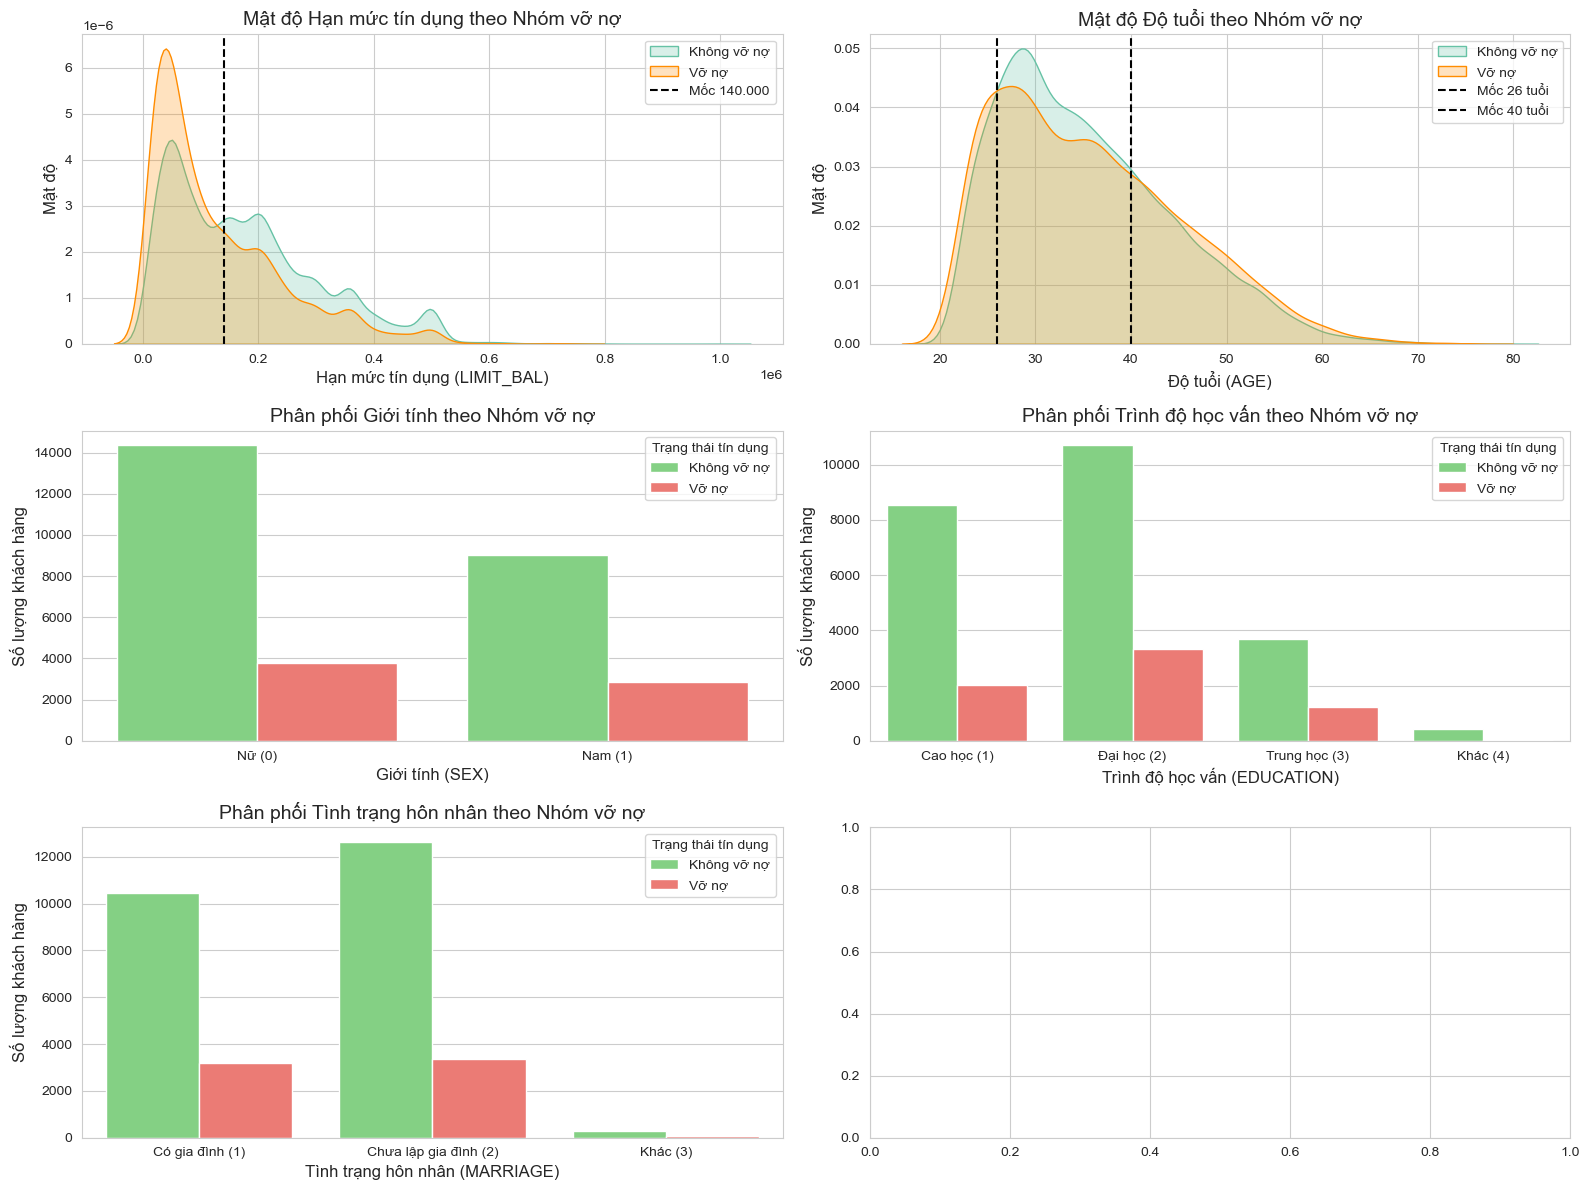

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Cấu hình chung cho biểu đồ
sns.set_style("whitegrid")
sns.set_palette("Set2")  # Màu sắc chuyên nghiệp hơn

# Tạo subplot gồm 3 hàng, 2 cột
fig, axs = plt.subplots(3, 2, figsize=(16, 12))

# --- 1. Biểu đồ mật độ của hạn mức tín dụng (LIMIT_BAL) ---
defaulters = data.loc[data['default.payment.next.month'] == 1]['LIMIT_BAL']
non_defaulters = data.loc[data['default.payment.next.month'] == 0]['LIMIT_BAL']
axs[0, 0].set_title('Mật độ Hạn mức tín dụng theo Nhóm vỡ nợ', fontsize=14)
sns.kdeplot(non_defaulters, fill=True, label='Không vỡ nợ', ax=axs[0, 0])
sns.kdeplot(defaulters, fill=True, label='Vỡ nợ', color='darkorange', ax=axs[0, 0])
axs[0, 0].axvline(140000, linestyle='--', color='black', label='Mốc 140.000')
axs[0, 0].set_xlabel("Hạn mức tín dụng (LIMIT_BAL)", fontsize=12)
axs[0, 0].set_ylabel("Mật độ", fontsize=12)
axs[0, 0].legend()

# --- 2. Biểu đồ mật độ của độ tuổi (AGE) ---
defaulters_age = data.loc[data['default.payment.next.month'] == 1]['AGE']
non_defaulters_age = data.loc[data['default.payment.next.month'] == 0]['AGE']
axs[0, 1].set_title('Mật độ Độ tuổi theo Nhóm vỡ nợ', fontsize=14)
sns.kdeplot(non_defaulters_age, fill=True, label='Không vỡ nợ', ax=axs[0, 1])
sns.kdeplot(defaulters_age, fill=True, label='Vỡ nợ', color='darkorange', ax=axs[0, 1])
axs[0, 1].axvline(26, linestyle='--', color='black', label='Mốc 26 tuổi')
axs[0, 1].axvline(40, linestyle='--', color='black', label='Mốc 40 tuổi')
axs[0, 1].set_xlabel("Độ tuổi (AGE)", fontsize=12)
axs[0, 1].set_ylabel("Mật độ", fontsize=12)
axs[0, 1].legend()

# --- 3. Biểu đồ phân phối giới tính (SEX) ---
axs[1, 0].set_title('Phân phối Giới tính theo Nhóm vỡ nợ', fontsize=14)
sns.countplot(x='SEX', hue='default.payment.next.month', data=data, ax=axs[1, 0], palette=["#77DD77", "#FF6961"])
axs[1, 0].set_xticklabels(['Nữ (0)', 'Nam (1)'])
axs[1, 0].set_xlabel("Giới tính (SEX)", fontsize=12)
axs[1, 0].set_ylabel("Số lượng khách hàng", fontsize=12)
axs[1, 0].legend(title="Trạng thái tín dụng", labels=["Không vỡ nợ", "Vỡ nợ"])

# --- 4. Biểu đồ phân phối trình độ học vấn (EDUCATION) ---
axs[1, 1].set_title('Phân phối Trình độ học vấn theo Nhóm vỡ nợ', fontsize=14)
sns.countplot(x='EDUCATION', hue='default.payment.next.month', data=data, ax=axs[1, 1], palette=["#77DD77", "#FF6961"])
axs[1, 1].set_xticklabels(['Cao học (1)', 'Đại học (2)', 'Trung học (3)', 'Khác (4)'])
axs[1, 1].set_xlabel("Trình độ học vấn (EDUCATION)", fontsize=12)
axs[1, 1].set_ylabel("Số lượng khách hàng", fontsize=12)
axs[1, 1].legend(title="Trạng thái tín dụng", labels=["Không vỡ nợ", "Vỡ nợ"])

# --- 5. Biểu đồ phân phối tình trạng hôn nhân (MARRIAGE) ---
axs[2, 0].set_title('Phân phối Tình trạng hôn nhân theo Nhóm vỡ nợ', fontsize=14)
sns.countplot(x='MARRIAGE', hue='default.payment.next.month', data=data, ax=axs[2, 0], palette=["#77DD77", "#FF6961"])
axs[2, 0].set_xticklabels(['Có gia đình (1)', 'Chưa lập gia đình (2)', 'Khác (3)'])
axs[2, 0].set_xlabel("Tình trạng hôn nhân (MARRIAGE)", fontsize=12)
axs[2, 0].set_ylabel("Số lượng khách hàng", fontsize=12)
axs[2, 0].legend(title="Trạng thái tín dụng", labels=["Không vỡ nợ", "Vỡ nợ"])

# Tăng khoảng cách giữa các biểu đồ
fig.tight_layout()

plt.savefig('credit_risk_analysis_extended.png', dpi=300, bbox_inches='tight')

# Hiển thị biểu đồ
plt.show()

Phần lớn khách hàng vỡ nợ có hạn mức tín dụng thấp hơn 140.000.
Tỷ lệ khách hàng không vỡ nợ trải rộng hơn và có nhiều người có hạn mức tín dụng cao hơn.

Tỷ lệ vỡ nợ cao ở nhóm dưới 26 tuổi
Tỷ lệ vỡ nợ giảm sau 40 tuổi
Nhóm từ 26 đến 40 tuổi có tỷ lệ vỡ nợ thấp hơn so với nhóm dưới 26 tuổi nhưng vẫn cao hơn so với nhóm trên 40 tuổi.

C:\Users\user\AppData\Local\Temp\ipykernel_13300\3482363321.py:2: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_default_rate = data.groupby('AGE_GROUP')['default.payment.next.month'].mean()


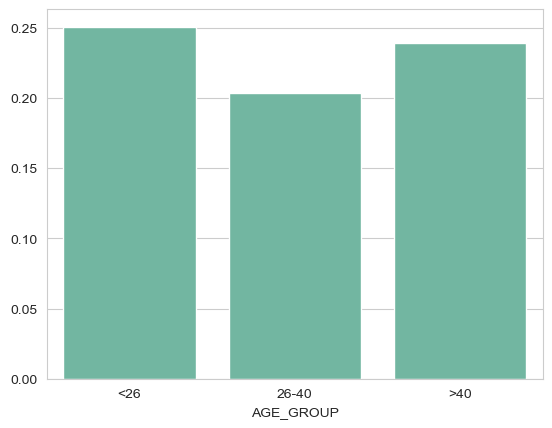

In [ ]:
data['AGE_GROUP'] = pd.cut(data['AGE'], bins=[20, 26, 40, 80], labels=['<26', '26-40', '>40'])
age_default_rate = data.groupby('AGE_GROUP')['default.payment.next.month'].mean()

sns.barplot(x=age_default_rate.index, y=age_default_rate.values)
plt.show()

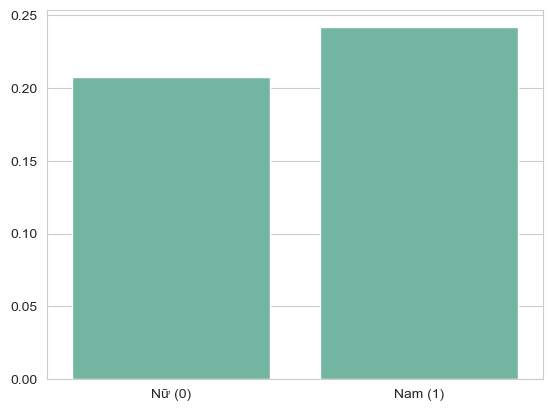

In [ ]:
sex_default_rate = data.groupby('SEX')['default.payment.next.month'].mean()
sns.barplot(x=['Nữ (0)', 'Nam (1)'], y=sex_default_rate.values)
plt.show()

Nam có tỷ lệ vỡ nợ cao hơn Nữ.

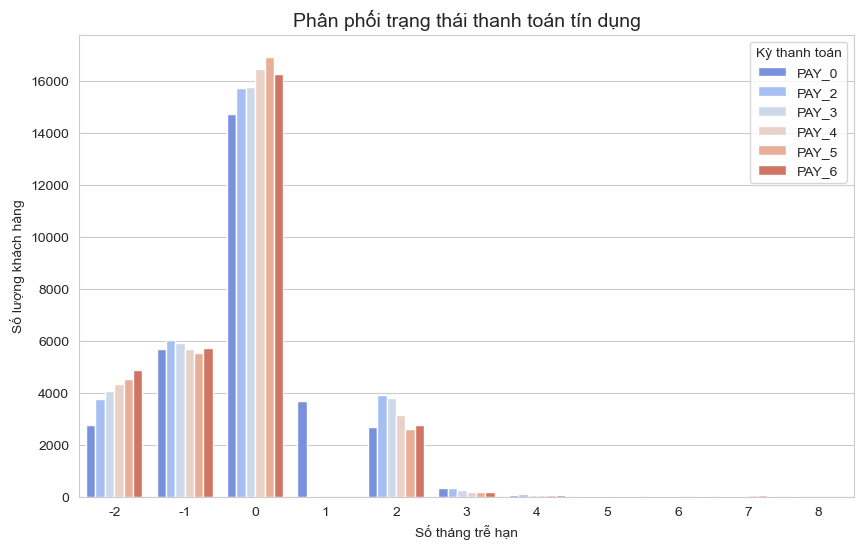

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']
pay_data = data[pay_cols].melt(var_name="Month", value_name="Status")

sns.countplot(x="Status", hue="Month", data=pay_data, palette="coolwarm", ax=ax)
ax.set_title("Phân phối trạng thái thanh toán tín dụng", fontsize=14)
ax.set_xlabel("Số tháng trễ hạn")
ax.set_ylabel("Số lượng khách hàng")
plt.legend(title="Kỳ thanh toán")
plt.show()

Phần lớn khách hàng thanh toán đúng hạn (PAY = 0) hoặc sớm (PAY < 0).
Có một tỷ lệ đáng kể khách hàng trễ hạn từ 1 - 2 tháng, nhưng trễ hạn dài hơn 3 tháng là dấu hiệu cảnh báo rủi ro.
Xu hướng trễ hạn có thể có tính lặp lại giữa các kỳ thanh toán.

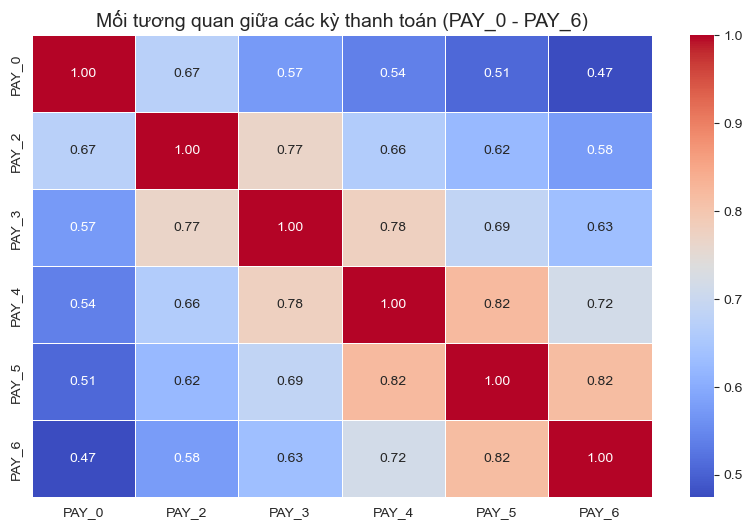

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột trạng thái thanh toán từ PAY_0 đến PAY_6
pay_cols = ['PAY_0', 'PAY_2', 'PAY_3', 'PAY_4', 'PAY_5', 'PAY_6']

# Tính ma trận tương quan
corr_matrix = data[pay_cols].corr()

# Vẽ heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", linewidths=0.5, fmt=".2f")

# Thiết lập tiêu đề
plt.title("Mối tương quan giữa các kỳ thanh toán (PAY_0 - PAY_6)", fontsize=14)
plt.show()

Tương quan cao giữa các kỳ gần nhau (PAY_2-PAY_3, PAY_3 - PAY_4, PAY_4 - PAY_5, PAY_5 - PAY_6)

PAY_4 và PAY_5 có mức tương quan rất cao (0.82), tương tự giữa PAY_5 - PAY_6 (0.82).
PAY_3 và PAY_4 có tương quan mạnh (0.78).
=> Điều này có nghĩa là nếu khách hàng trễ hạn trong một kỳ, họ có xu hướng tiếp tục trễ hạn trong kỳ tiếp theo.

Từ PAY_0 đến PAY_6, tương quan giảm dần từ 0.67 xuống 0.47.
=> Điều này cho thấy rằng trạng thái thanh toán trong kỳ gần nhất (PAY_0) có ảnh hưởng mạnh nhất đến các kỳ trước đó nhưng giảm dần khi đi xa hơn trong quá khứ.

**Giảm số lượng biến đầu vào trong mô hình Machine Learning, chỉ PAY_0, PAY_2, và PAY_3 thay vì toàn bộ PAY_0 - PAY_6.**

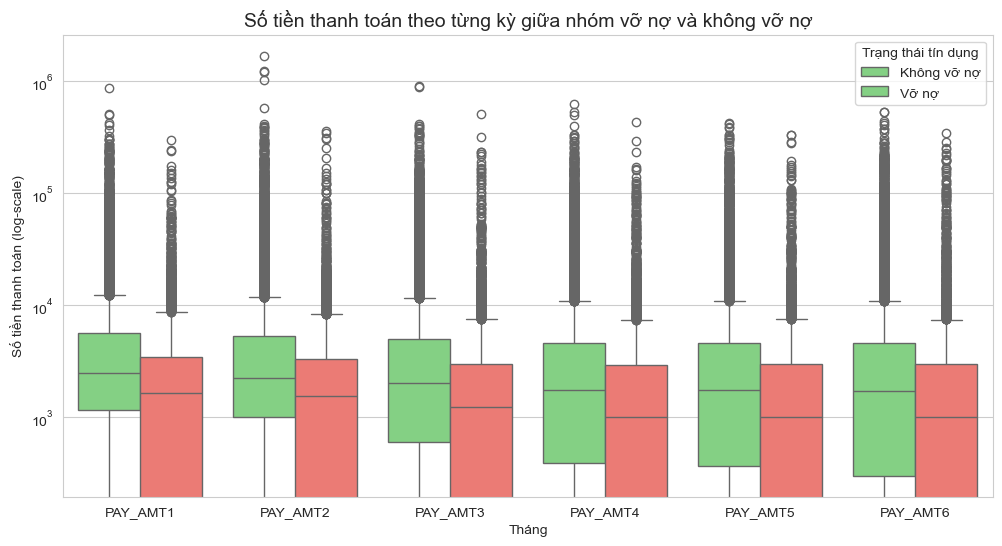

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột thanh toán
pay_amt_cols = ['PAY_AMT1',
       'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Tạo dữ liệu dạng long-form để dễ vẽ biểu đồ
pay_amt_data = data.melt(id_vars=['default.payment.next.month'], value_vars=pay_amt_cols,
                         var_name="Month", value_name="Payment")

# Vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Payment", hue="default.payment.next.month", data=pay_amt_data, palette=["#77DD77", "#FF6961"])
plt.yscale("log")  # Log-scale để hiển thị dữ liệu rõ hơn
plt.title("Số tiền thanh toán theo từng kỳ giữa nhóm vỡ nợ và không vỡ nợ", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Số tiền thanh toán (log-scale)")
plt.legend(title="Trạng thái tín dụng", labels=["Không vỡ nợ", "Vỡ nợ"])
plt.show()

Nhóm không vỡ nợ (0, màu xanh) có số tiền thanh toán trung vị cao hơn nhóm vỡ nợ (1, màu đỏ) trong tất cả các tháng.
Phân phối của nhóm không vỡ nợ rộng hơn, có nhiều khách hàng thanh toán khoản lớn hơn.

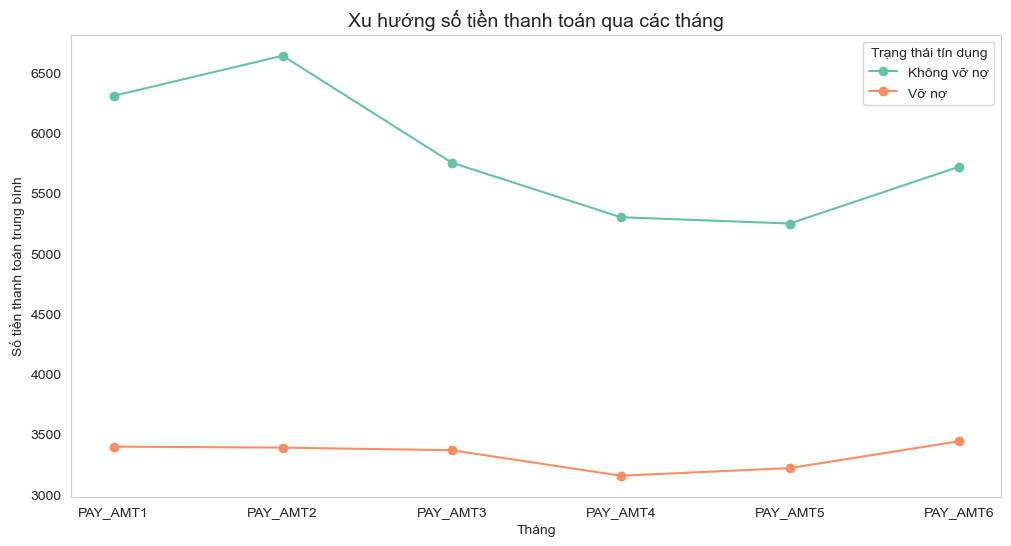

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

pay_amt_cols = ["PAY_AMT1", "PAY_AMT2", "PAY_AMT3", "PAY_AMT4", "PAY_AMT5", "PAY_AMT6"]

# Tính trung bình số tiền thanh toán theo nhóm vỡ nợ và không vỡ nợ
pay_amt_mean = data.groupby("default.payment.next.month")[pay_amt_cols].mean().T

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
for i, label in enumerate(["Không vỡ nợ", "Vỡ nợ"]):
    plt.plot(pay_amt_mean.index, pay_amt_mean.iloc[:, i], marker='o', label=label)

plt.title("Xu hướng số tiền thanh toán qua các tháng", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Số tiền thanh toán trung bình")
plt.legend(title="Trạng thái tín dụng")
plt.grid()
plt.show()


In [ ]:
from scipy.stats import f_oneway, kruskal

# Định nghĩa danh sách cột PAY_AMT trước khi sử dụng
pay_amt_cols = ['PAY_AMT1', 'PAY_AMT2', 'PAY_AMT3', 'PAY_AMT4', 'PAY_AMT5', 'PAY_AMT6']

# Tạo tập dữ liệu theo nhóm vỡ nợ và không vỡ nợ
non_default_data = data[data["default.payment.next.month"] == 0][pay_amt_cols]
default_data = data[data["default.payment.next.month"] == 1][pay_amt_cols]

# Kiểm định ANOVA (nếu dữ liệu có phân phối chuẩn)
f_stat, p_val_anova = f_oneway(*[non_default_data[col] for col in pay_amt_cols])
print(f"ANOVA p-value (Non-default): {p_val_anova:.4e}")

# Kiểm định Kruskal-Wallis (nếu dữ liệu không có phân phối chuẩn)
h_stat, p_val_kruskal = kruskal(*[non_default_data[col] for col in pay_amt_cols])
print(f"Kruskal-Wallis p-value (Non-default): {p_val_kruskal:.4e}")

ANOVA p-value (Non-default): 2.5524e-19
Kruskal-Wallis p-value (Non-default): 0.0000e+00


xu hướng dao động của nhóm không vỡ nợ là có ý nghĩa thống kê, không phải do ngẫu nhiên.

Nhóm không vỡ nợ (0, màu xanh) có xu hướng thanh toán cao hơn nhóm vỡ nợ (1, màu đỏ) trong tất cả các tháng.
Thanh toán trung bình của nhóm không vỡ nợ dao động từ 5500 - 6600, trong khi nhóm vỡ nợ chỉ khoảng 3200 - 3400.
Nhóm không vỡ nợ có xu hướng thanh toán cao nhất ở tháng PAY_AMT2, sau đó giảm nhẹ trước khi tăng lại ở PAY_AMT6.
Nhóm vỡ nợ có thanh toán trung bình gần như ổn định nhưng ở mức rất thấp => có thể đang trả khoản tối thiểu cần thiết thay vì trả hết nợ.

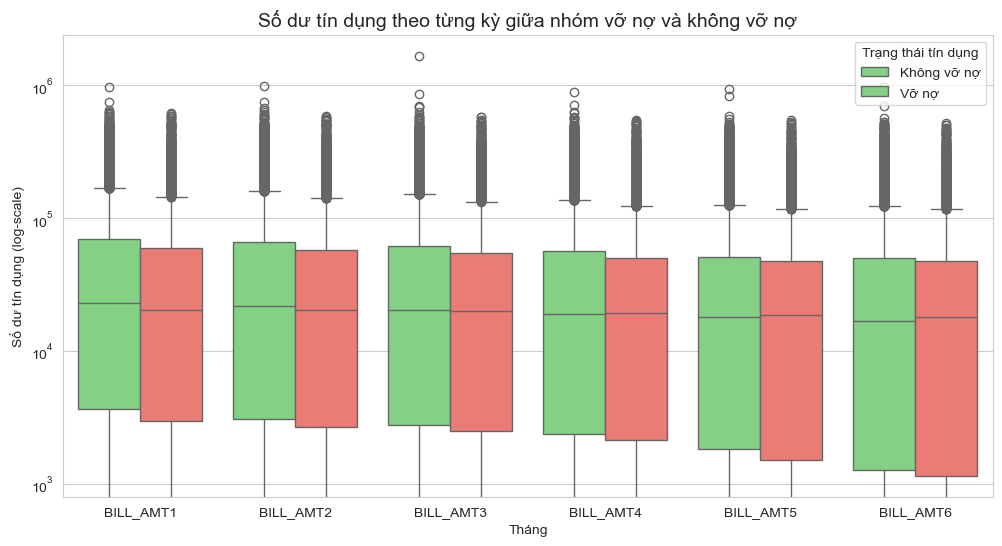

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Chọn các cột số dư sao kê
bill_amt_cols = ['BILL_AMT1', 'BILL_AMT2', 'BILL_AMT3', 'BILL_AMT4', 'BILL_AMT5', 'BILL_AMT6']

# Định dạng dữ liệu dạng long-form để dễ vẽ biểu đồ
bill_amt_data = data.melt(id_vars=['default.payment.next.month'], value_vars=bill_amt_cols,
                          var_name="Month", value_name="Bill_Amount")

# Vẽ boxplot
plt.figure(figsize=(12, 6))
sns.boxplot(x="Month", y="Bill_Amount", hue="default.payment.next.month", data=bill_amt_data, palette=["#77DD77", "#FF6961"])
plt.yscale("log")  # Log-scale để hiển thị dữ liệu rõ hơn
plt.title("Số dư tín dụng theo từng kỳ giữa nhóm vỡ nợ và không vỡ nợ", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Số dư tín dụng (log-scale)")
plt.legend(title="Trạng thái tín dụng", labels=["Không vỡ nợ", "Vỡ nợ"])
plt.show()

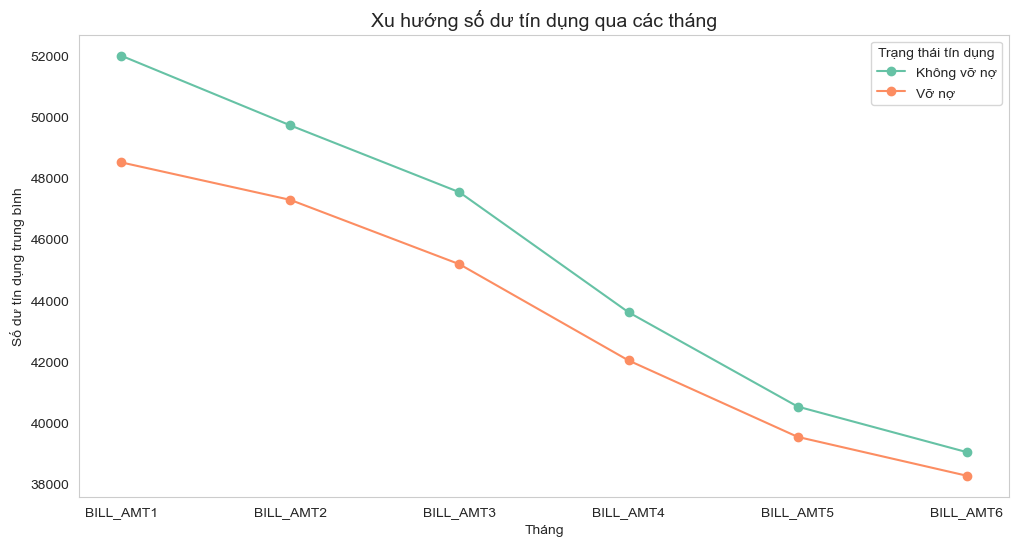

In [ ]:
import numpy as np

# Tính trung bình số dư tín dụng theo nhóm vỡ nợ và không vỡ nợ
bill_amt_mean = data.groupby("default.payment.next.month")[bill_amt_cols].mean().T

# Vẽ biểu đồ line plot
plt.figure(figsize=(12, 6))
for i, label in enumerate(["Không vỡ nợ", "Vỡ nợ"]):
    plt.plot(bill_amt_mean.index, bill_amt_mean.iloc[:, i], marker='o', label=label)

plt.title("Xu hướng số dư tín dụng qua các tháng", fontsize=14)
plt.xlabel("Tháng")
plt.ylabel("Số dư tín dụng trung bình")
plt.legend(title="Trạng thái tín dụng")
plt.grid()
plt.show()

Số dư trung bình của cả hai nhóm có xu hướng giảm dần qua thời gian.
Nhóm không vỡ nợ (0, màu xanh) luôn có số dư trung bình cao hơn nhóm vỡ nợ (1, màu đỏ).
Sự chênh lệch giữa hai nhóm duy trì ổn định, nhưng xu hướng chung là giảm số dư.

C:\Users\user\AppData\Local\Temp\ipykernel_13300\1933498167.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=data, palette=["#77DD77", "#FF6961"])


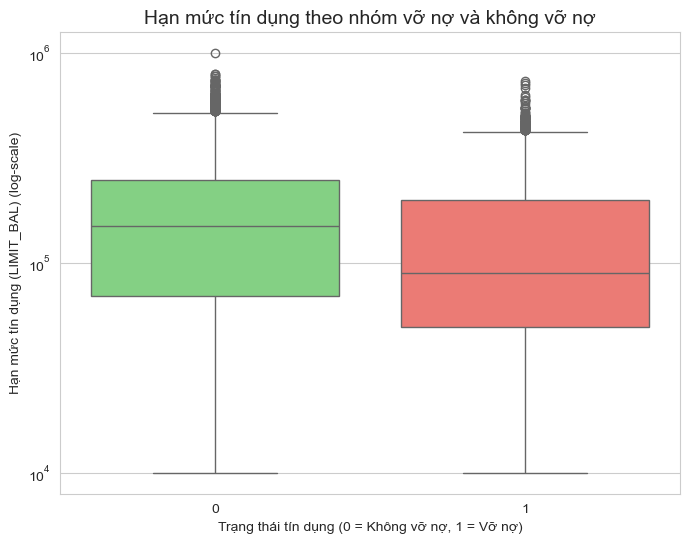

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Vẽ boxplot
plt.figure(figsize=(8, 6))
sns.boxplot(x="default.payment.next.month", y="LIMIT_BAL", data=data, palette=["#77DD77", "#FF6961"])
plt.yscale("log")  # Log-scale để dễ thấy sự khác biệt
plt.title("Hạn mức tín dụng theo nhóm vỡ nợ và không vỡ nợ", fontsize=14)
plt.xlabel("Trạng thái tín dụng (0 = Không vỡ nợ, 1 = Vỡ nợ)")
plt.ylabel("Hạn mức tín dụng (LIMIT_BAL) (log-scale)")
plt.show()

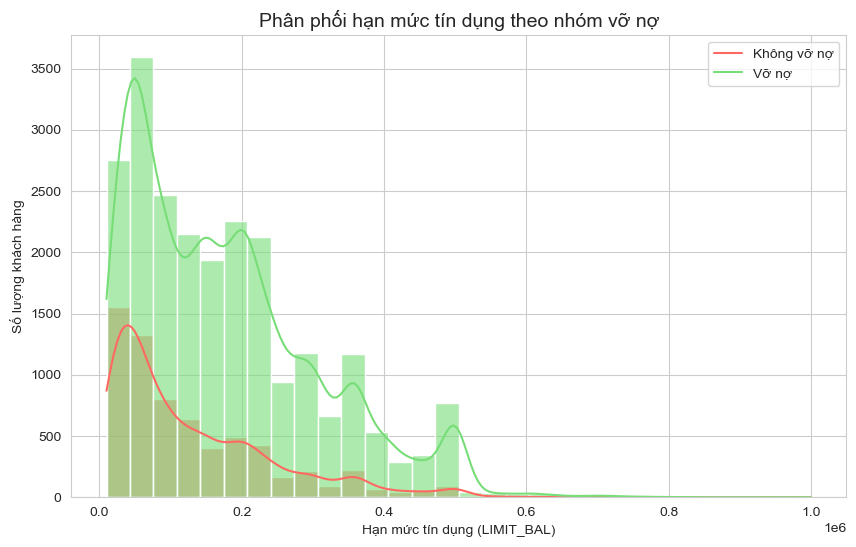

In [ ]:
plt.figure(figsize=(10, 6))
sns.histplot(data, x="LIMIT_BAL", hue="default.payment.next.month", bins=30, kde=True, palette=["#77DD77", "#FF6961"], alpha=0.6)
plt.title("Phân phối hạn mức tín dụng theo nhóm vỡ nợ", fontsize=14)
plt.xlabel("Hạn mức tín dụng (LIMIT_BAL)")
plt.ylabel("Số lượng khách hàng")
plt.legend(["Không vỡ nợ", "Vỡ nợ"])
plt.show()

Trung vị của nhóm không vỡ nợ (màu xanh) cao hơn trung vị của nhóm vỡ nợ (màu đỏ).
Nhóm vỡ nợ có xu hướng có hạn mức tín dụng thấp hơn.
Nhóm không vỡ nợ có phân bố rộng hơn, với một số khách hàng có hạn mức tín dụng rất cao.
Có nhiều giá trị ngoại lệ (outliers) trong cả hai nhóm, nhưng nhóm không vỡ nợ có nhiều khách hàng có hạn mức tín dụng rất cao (~1 triệu).

# Chia tập dữ liệu Train 70%, Test 30%

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Định nghĩa biến mục tiêu
target = "default.payment.next.month"

# Kiểm tra tổng kích thước dữ liệu
print(f"Tổng số dữ liệu: {data.shape[0]}")
print(f"Non-default: {sum(data[target] == 0)}")
print(f"Default: {sum(data[target] == 1)}")

# Chia dữ liệu thành tập Train (70%) và Test (30%) theo tỷ lệ stratify
train_data, test_data = train_test_split(
    data, test_size=0.30, stratify=data[target], random_state=42
)

# Xác định cột số và cột danh mục
numerical_features = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data.select_dtypes(exclude=['number']).columns.tolist()

# Sử dụng pandas get_dummies để thay thế OneHotEncoder
X_train_cat = pd.get_dummies(train_data[categorical_features], drop_first=True)
X_test_cat = pd.get_dummies(test_data[categorical_features], drop_first=True)

# Tạo bộ chuẩn hóa StandardScaler cho các biến số
scaler = StandardScaler()
X_train_num = scaler.fit_transform(train_data[numerical_features])
X_test_num = scaler.transform(test_data[numerical_features])

# Kết hợp dữ liệu số và danh mục
X_train = np.hstack((X_train_num, X_train_cat.values))
X_test = np.hstack((X_test_num, X_test_cat.values))

# Mảng nhãn mục tiêu
y_train = train_data[target].values
y_test = test_data[target].values

# Kiểm tra lại phân phối dữ liệu trong train và test
print("\nPhân phối dữ liệu trong từng tập:")
for name, dataset in zip(["Train", "Test"], [train_data, test_data]):
    counts = dataset[target].value_counts()
    total = len(dataset)
    print(f"{name}:")
    print(counts)

Tổng số dữ liệu: 30000
Non-default: 23364
Default: 6636

Phân phối dữ liệu trong từng tập:
Train:
default.payment.next.month
0    16355
1     4645
Name: count, dtype: int64
Test:
default.payment.next.month
0    7009
1    1991
Name: count, dtype: int64


# LOGISTIC REGRESSION

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

# Tạo mô hình Logistic Regression
log_reg = LogisticRegression(max_iter=1000, random_state=42)

# Định nghĩa lại grid search để tránh lỗi
param_grid = [
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l1'], 'solver': ['liblinear']},  # liblinear hỗ trợ L1
    {'C': [0.01, 0.1, 1, 10, 100], 'penalty': ['l2'], 'solver': ['liblinear', 'lbfgs']}  # l2 hỗ trợ cả hai solver
]

grid_search = GridSearchCV(log_reg, param_grid, scoring='recall', cv=5, error_score='raise')
grid_search.fit(X_train, y_train)

# In kết quả
print("Best Parameters:", grid_search.best_params_)
best_model = grid_search.best_estimator_

Best Parameters: {'C': 0.01, 'penalty': 'l1', 'solver': 'liblinear'}


Số lượng thành phần chính giữ lại sau PCA: 17
Training on Raw Data...


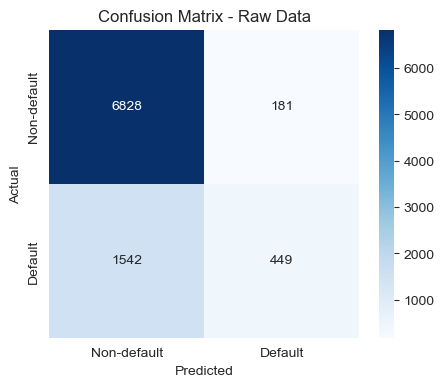

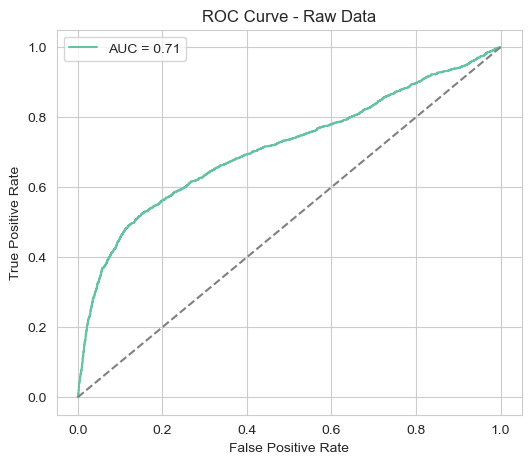

Classification Report - Raw Data:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.71      0.23      0.34      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Training on Reduced Features (PAY_0, PAY_2, PAY_3)...


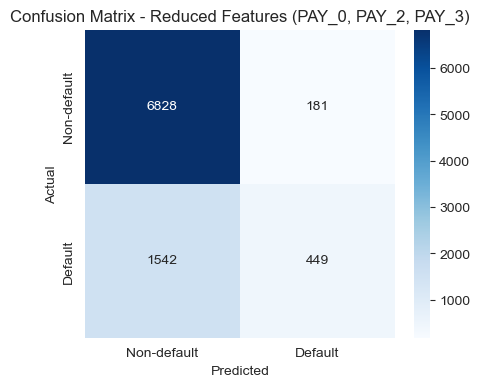

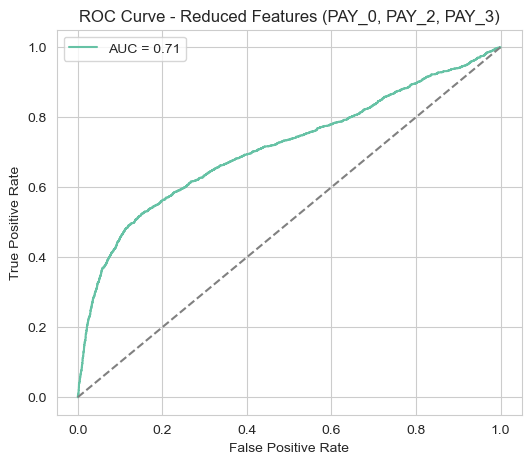

Classification Report - Reduced Features (PAY_0, PAY_2, PAY_3):
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      7009
           1       0.71      0.23      0.34      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.60      0.62      9000
weighted avg       0.79      0.81      0.77      9000

Applying SMOTE...


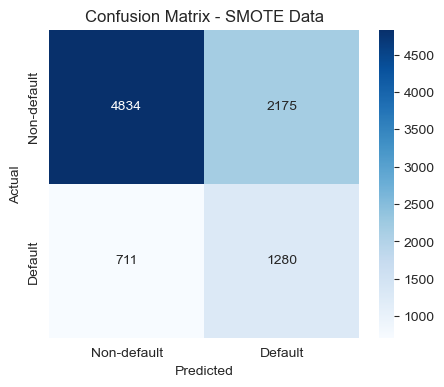

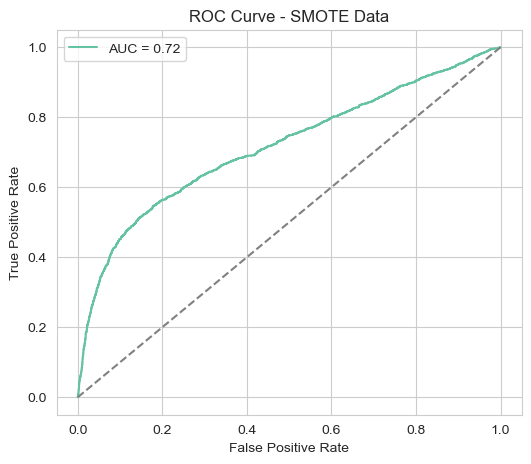

Classification Report - SMOTE Data:
              precision    recall  f1-score   support

           0       0.87      0.69      0.77      7009
           1       0.37      0.64      0.47      1991

    accuracy                           0.68      9000
   macro avg       0.62      0.67      0.62      9000
weighted avg       0.76      0.68      0.70      9000

Applying Under-Sampling...


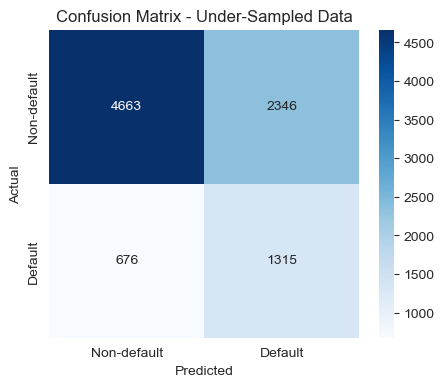

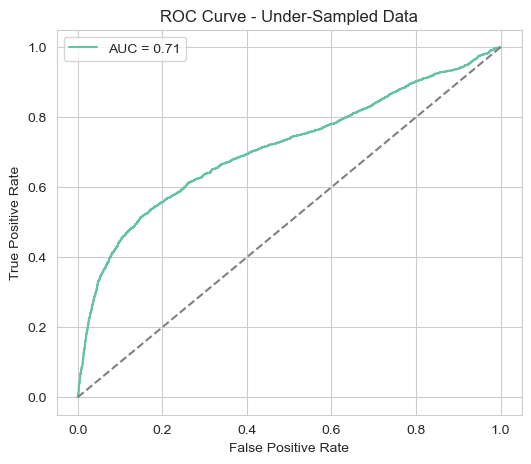

Classification Report - Under-Sampled Data:
              precision    recall  f1-score   support

           0       0.87      0.67      0.76      7009
           1       0.36      0.66      0.47      1991

    accuracy                           0.66      9000
   macro avg       0.62      0.66      0.61      9000
weighted avg       0.76      0.66      0.69      9000

Training on PCA Data...


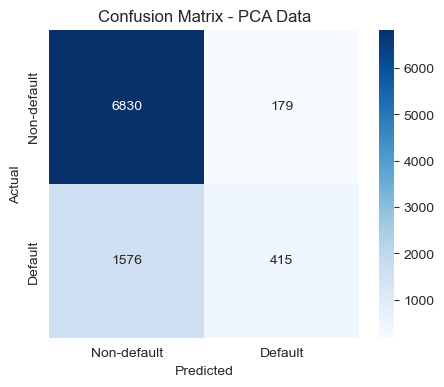

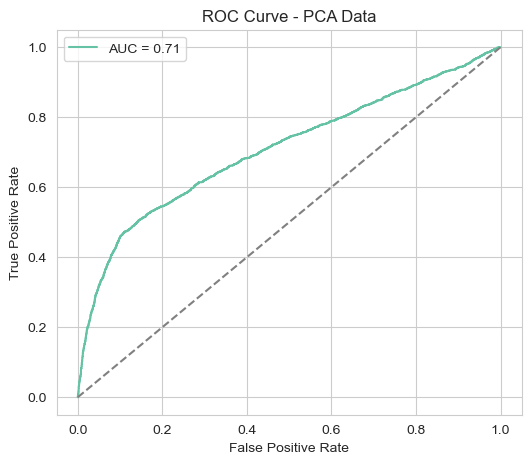

Classification Report - PCA Data:
              precision    recall  f1-score   support

           0       0.81      0.97      0.89      7009
           1       0.70      0.21      0.32      1991

    accuracy                           0.81      9000
   macro avg       0.76      0.59      0.60      9000
weighted avg       0.79      0.81      0.76      9000


Summary of Results:
                                   Method  Accuracy    Recall  Precision  \
0                                Raw Data  0.808556  0.599845   0.764235   
1  Reduced Features (PAY_0, PAY_2, PAY_3)  0.808556  0.599845   0.764235   
2                              SMOTE Data  0.679333  0.666289   0.621127   
3                      Under-Sampled Data  0.664222  0.662880   0.616288   
4                                PCA Data  0.805000  0.591450   0.755584   

   F1-score       AUC  
0  0.615291  0.712227  
1  0.615291  0.712227  
2  0.620091  0.716255  
3  0.610293  0.711751  
4  0.603617  0.708205  


,Method,Accuracy,Recall,Precision,F1-score,AUC
0,Raw Data,0.808556,0.599845,0.764235,0.615291,0.712227
1,"Reduced Features (PAY_0, PAY_2, PAY_3)",0.808556,0.599845,0.764235,0.615291,0.712227
2,SMOTE Data,0.679333,0.666289,0.621127,0.620091,0.716255
3,Under-Sampled Data,0.664222,0.662880,0.616288,0.610293,0.711751
4,PCA Data,0.805000,0.591450,0.755584,0.603617,0.708205


C:\Users\user\AppData\Local\Temp\ipykernel_13300\3622766231.py:147: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")


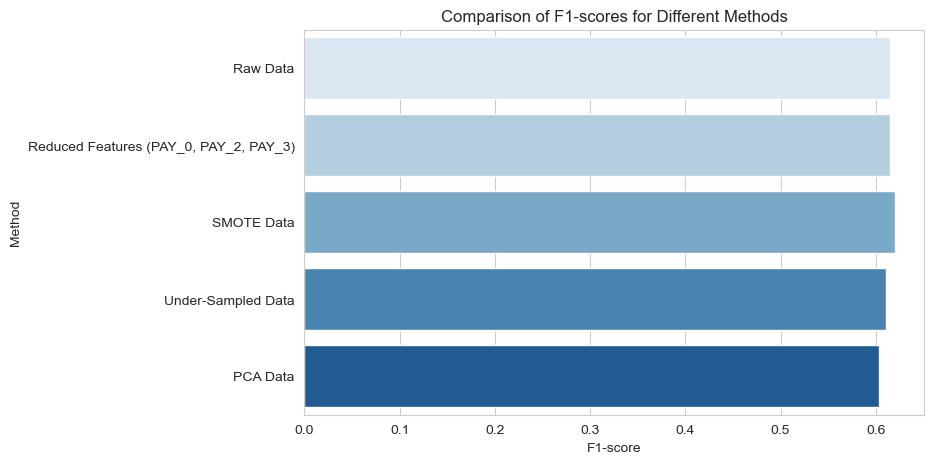

Training Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA

# Define target variable
target = "default.payment.next.month"

# Xác định các cột số và cột danh mục
numerical_features = train_data.select_dtypes(include=['number']).columns.tolist()
categorical_features = train_data.select_dtypes(exclude=['number']).columns.tolist()

# **Loại bỏ cột target khỏi danh sách numerical**
if target in numerical_features:
    numerical_features.remove(target)

# **Mã hóa biến danh mục bằng OneHotEncoder**
encoder = OneHotEncoder(handle_unknown="ignore", sparse_output=False)
encoder.fit(train_data[categorical_features])

# **Chuẩn hóa biến số bằng StandardScaler**
scaler = StandardScaler()
scaler.fit(train_data[numerical_features])  # Fit trên train trước khi transform!

def preprocess_data(data):
    """Tiền xử lý dữ liệu: Chuẩn hóa dữ liệu số và mã hóa dữ liệu danh mục"""
    X_num = scaler.transform(data[numerical_features])  # Scale biến số
    X_cat = encoder.transform(data[categorical_features])  # OneHot biến danh mục
    X = np.hstack((X_num, X_cat))  # Gộp cả hai lại
    y = data[target].values  # Chuyển nhãn thành numpy array
    return X, y

# **Tiền xử lý dữ liệu**
X_train, y_train = preprocess_data(train_data)
X_test, y_test = preprocess_data(test_data)

# **Áp dụng PCA để giảm chiều dữ liệu**
pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Kiểm tra số lượng thành phần chính sau khi giảm chiều
print(f"Số lượng thành phần chính giữ lại sau PCA: {X_train_pca.shape[1]}")

# Khởi tạo danh sách để lưu kết quả
results = []

# Hàm huấn luyện và đánh giá mô hình với tham số tối ưu
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = LogisticRegression(
        random_state=42,
        max_iter=1000,
        C=0.01,  # Cập nhật tham số tối ưu
        penalty='l1',  # Cập nhật tham số tối ưu
        solver='liblinear'  # Cập nhật tham số tối ưu
    )

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Vẽ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-default", "Default"],
                yticklabels=["Non-default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    # Vẽ ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.show()

    # Classification Report
    print(f"Classification Report - {title}:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # Lưu kết quả vào danh sách
    results.append({
        "Method": title,
        "Accuracy": accuracy,
        "Recall": report["macro avg"]["recall"],
        "Precision": report["macro avg"]["precision"],
        "F1-score": report["macro avg"]["f1-score"],
        "AUC": roc_auc
    })

    return model

# Logistic Regression trên dữ liệu gốc
print("Training on Raw Data...")
logistic_raw = train_and_evaluate(X_train, y_train, X_test, y_test, "Raw Data")

#. Logistic Regression với giảm số lượng biến (chỉ sử dụng PAY_0, PAY_2, PAY_3)
print("Training on Reduced Features (PAY_0, PAY_2, PAY_3)...")
logistic_reduced = train_and_evaluate(X_train, y_train, X_test, y_test, "Reduced Features (PAY_0, PAY_2, PAY_3)")

# Logistic Regression với SMOTE
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
logistic_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, "SMOTE Data")

# Logistic Regression với Under-Sampling
print("Applying Under-Sampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
logistic_under = train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Under-Sampled Data")

# **Logistic Regression với PCA**
print("Training on PCA Data...")
logistic_pca = train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test, "PCA Data")

# Hiển thị bảng tổng hợp kết quả
results_df = pd.DataFrame(results)

print("\nSummary of Results:")
print(results_df)

import IPython.display as display
display.display(results_df)

# Vẽ biểu đồ F1-score
plt.figure(figsize=(8, 5))
sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")
plt.xlabel("F1-score")
plt.ylabel("Method")
plt.title("Comparison of F1-scores for Different Methods")
plt.show()

print("Training Complete!")

SMOTE Data

In [ ]:
from sklearn.metrics import precision_recall_curve

# Dự đoán xác suất trên tập test (lấy xác suất của lớp 1 - Default)
y_test_prob = logistic_raw.predict_proba(X_test)[:, 1]

# Tính Precision-Recall Curve
precision, recall, thresholds = precision_recall_curve(y_test, y_test_prob)

# Tìm index của threshold khi Precision ≈ Recall
optimal_idx = np.argmin(np.abs(precision - recall))
optimal_threshold = thresholds[optimal_idx]

print(f"Optimal Threshold (Balanced Precision-Recall): {optimal_threshold:.3f}")

Optimal Threshold (Balanced Precision-Recall): 0.270


In [ ]:
# Hàm huấn luyện và đánh giá mô hình với threshold tối ưu
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = LogisticRegression(
        random_state=42,
        max_iter=1000,
        C=0.01,  # Cập nhật tham số tối ưu
        penalty='l1',  # Cập nhật tham số tối ưu
        solver='liblinear'  # Cập nhật tham số tối ưu
    )

    model.fit(X_train, y_train)
    y_prob = model.predict_proba(X_test)[:, 1]  # Lấy xác suất dự đoán
    y_pred = (y_prob >= 0.270).astype(int)  # Áp dụng threshold mới

    # Tính accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Vẽ Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-default", "Default"],
                yticklabels=["Non-default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - Optimized Threshold (0.278) - {title}")
    plt.show()

    # Vẽ ROC Curve
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.axvline(0.278, color="red", linestyle="--", label="Optimal Threshold")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - Optimized Threshold (0.278) - {title}")
    plt.legend()
    plt.show()

    # Classification Report
    print(f"Classification Report - {title}:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # Lưu kết quả vào danh sách
    results.append({
        "Method": title,
        "Accuracy": accuracy,
        "Recall": report["macro avg"]["recall"],
        "Precision": report["macro avg"]["precision"],
        "F1-score": report["macro avg"]["f1-score"],
        "AUC": roc_auc
    })

    return model

# DECESION TREE

Training on Raw Data...


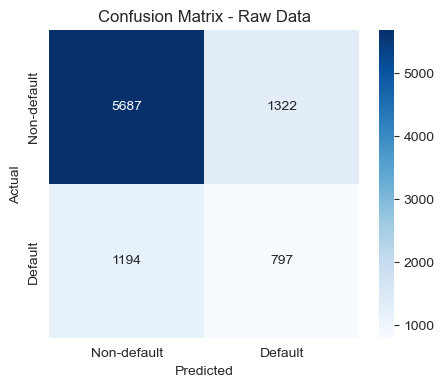

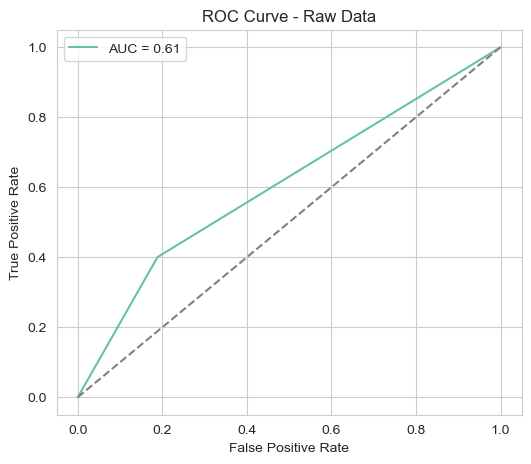

Classification Report - Raw Data:
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.72      9000

Training on Reduced Features (PAY_0, PAY_2, PAY_3)...


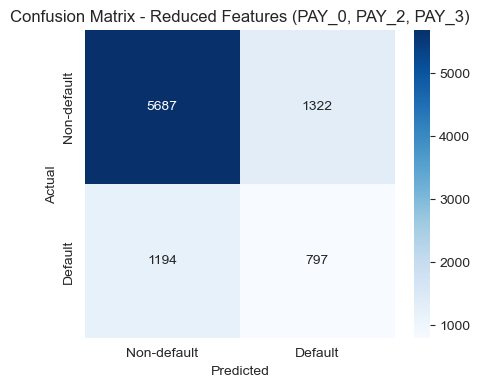

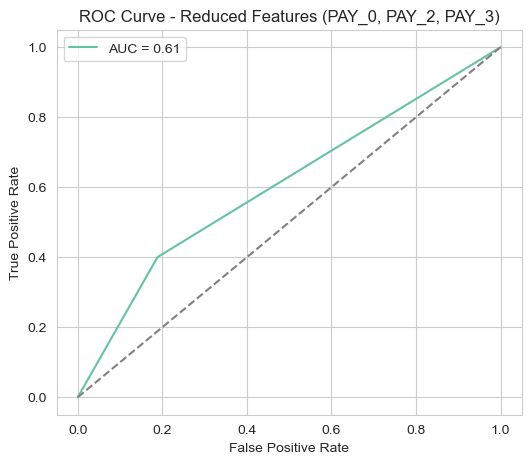

Classification Report - Reduced Features (PAY_0, PAY_2, PAY_3):
              precision    recall  f1-score   support

           0       0.83      0.81      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.60      9000
weighted avg       0.73      0.72      0.72      9000

Applying SMOTE...


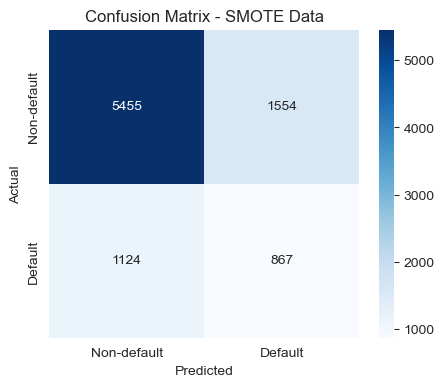

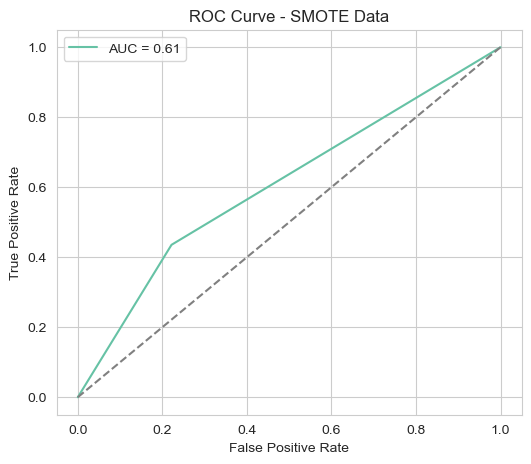

Classification Report - SMOTE Data:
              precision    recall  f1-score   support

           0       0.83      0.78      0.80      7009
           1       0.36      0.44      0.39      1991

    accuracy                           0.70      9000
   macro avg       0.59      0.61      0.60      9000
weighted avg       0.72      0.70      0.71      9000

Applying Under-Sampling...


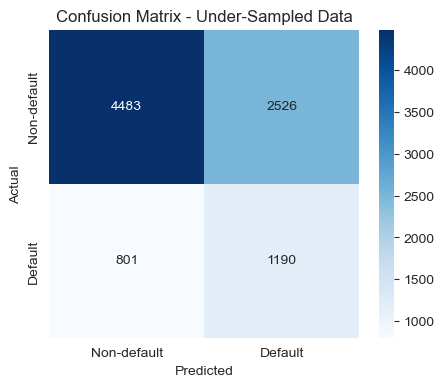

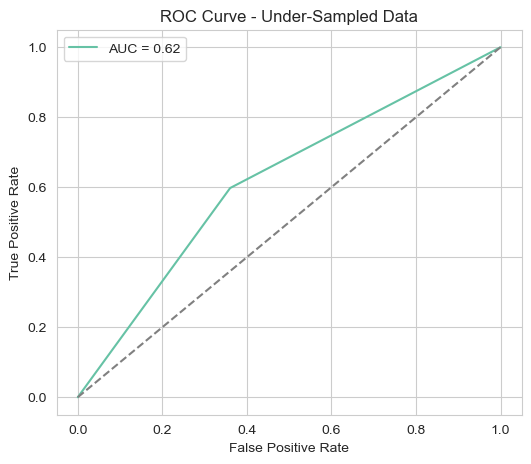

Classification Report - Under-Sampled Data:
              precision    recall  f1-score   support

           0       0.85      0.64      0.73      7009
           1       0.32      0.60      0.42      1991

    accuracy                           0.63      9000
   macro avg       0.58      0.62      0.57      9000
weighted avg       0.73      0.63      0.66      9000

Applying PCA...
Số lượng thành phần chính giữ lại sau PCA: 17


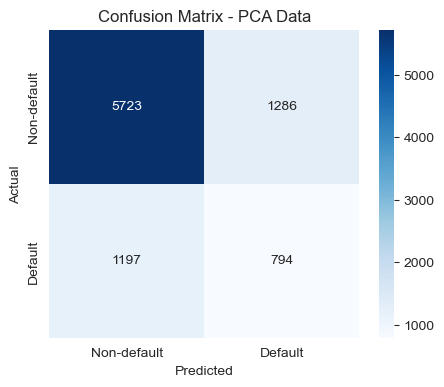

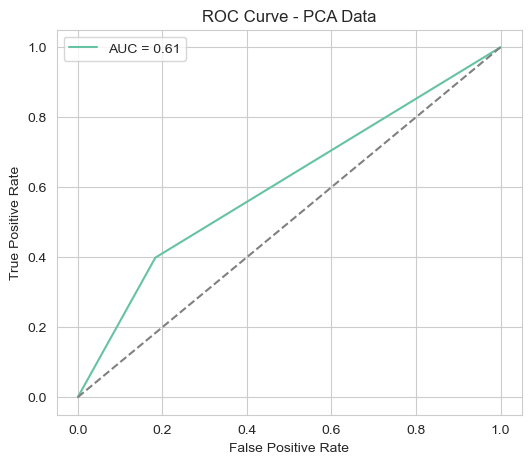

Classification Report - PCA Data:
              precision    recall  f1-score   support

           0       0.83      0.82      0.82      7009
           1       0.38      0.40      0.39      1991

    accuracy                           0.72      9000
   macro avg       0.60      0.61      0.61      9000
weighted avg       0.73      0.72      0.73      9000


Summary of Results:
                                   Method  Accuracy    Recall  Precision  \
0                                Raw Data  0.720444  0.605843   0.601300   
1  Reduced Features (PAY_0, PAY_2, PAY_3)  0.720444  0.605843   0.601300   
2                              SMOTE Data  0.702444  0.606872   0.593635   
3                      Under-Sampled Data  0.630333  0.618648   0.584324   
4                                PCA Data  0.724111  0.607658   0.604377   

   F1-score       AUC  
0  0.603349  0.605843  
1  0.603349  0.605843  
2  0.597967  0.606872  
3  0.573195  0.618648  
4  0.605907  0.607658  


,Method,Accuracy,Recall,Precision,F1-score,AUC
0,Raw Data,0.720444,0.605843,0.601300,0.603349,0.605843
1,"Reduced Features (PAY_0, PAY_2, PAY_3)",0.720444,0.605843,0.601300,0.603349,0.605843
2,SMOTE Data,0.702444,0.606872,0.593635,0.597967,0.606872
3,Under-Sampled Data,0.630333,0.618648,0.584324,0.573195,0.618648
4,PCA Data,0.724111,0.607658,0.604377,0.605907,0.607658


C:\Users\user\AppData\Local\Temp\ipykernel_13300\1782827513.py:107: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")


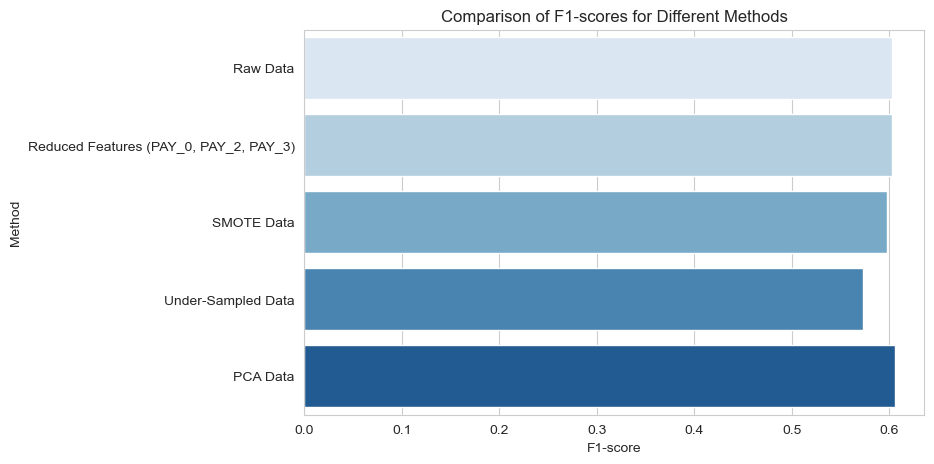

Training Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA  # Thêm PCA
import IPython.display as display

# **Khởi tạo DataFrame để lưu kết quả**
results = []

# **Huấn luyện và đánh giá Decision Tree**
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = DecisionTreeClassifier(random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # **Tính các chỉ số đánh giá**
    accuracy = accuracy_score(y_test, y_pred)

    # **Confusion Matrix**
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-default", "Default"], yticklabels=["Non-default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    # **ROC Curve**
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.show()

    print(f"Classification Report - {title}:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # **Lưu kết quả vào DataFrame**
    results.append({
        "Method": title,
        "Accuracy": accuracy,
        "Recall": report["macro avg"]["recall"],
        "Precision": report["macro avg"]["precision"],
        "F1-score": report["macro avg"]["f1-score"],
        "AUC": roc_auc
    })

    return model

# **1. Decision Tree trên dữ liệu gốc**
print("Training on Raw Data...")
dt_raw = train_and_evaluate(X_train, y_train, X_test, y_test, "Raw Data")

# **2. Decision Tree với giảm số lượng biến (PAY_0, PAY_2, PAY_3)**
print("Training on Reduced Features (PAY_0, PAY_2, PAY_3)...")
dt_reduced = train_and_evaluate(X_train, y_train, X_test, y_test, "Reduced Features (PAY_0, PAY_2, PAY_3)")

# **3. Decision Tree với SMOTE**
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
dt_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, "SMOTE Data")

# **4. Decision Tree với Under-Sampling**
print("Applying Under-Sampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
dt_under = train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Under-Sampled Data")

# **5. Decision Tree với PCA**
print("Applying PCA...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa dữ liệu trước khi áp dụng PCA
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Số lượng thành phần chính giữ lại sau PCA: {X_train_pca.shape[1]}")
dt_pca = train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test, "PCA Data")

# **Hiển thị bảng tổng hợp kết quả**
results_df = pd.DataFrame(results)

print("\nSummary of Results:")
print(results_df)

# **Hiển thị bảng tổng hợp**
display.display(results_df)

# **Vẽ biểu đồ F1-score**
plt.figure(figsize=(8, 5))
sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")
plt.xlabel("F1-score")
plt.ylabel("Method")
plt.title("Comparison of F1-scores for Different Methods")
plt.show()

print("Training Complete!")

PCA

In [ ]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'max_depth': [5, 10, 15, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'criterion': ['gini', 'entropy']
}

grid_search = GridSearchCV(DecisionTreeClassifier(random_state=42), param_grid, cv=5, scoring='f1')
grid_search.fit(X_train, y_train)

# In ra tham số tối ưu
best_params = grid_search.best_params_
print("Best Parameters:", best_params)

Best Parameters: {'criterion': 'entropy', 'max_depth': 5, 'min_samples_leaf': 4, 'min_samples_split': 2}


In [ ]:
best_model = DecisionTreeClassifier(
    random_state=42,
    max_depth=best_params['max_depth'],
    min_samples_split=best_params['min_samples_split'],
    min_samples_leaf=best_params['min_samples_leaf'],
    criterion=best_params['criterion']
)

best_model.fit(X_train, y_train)
y_probs = best_model.predict_proba(X_test)[:, 1]

# RANDOM FOREST

Training on Raw Data...


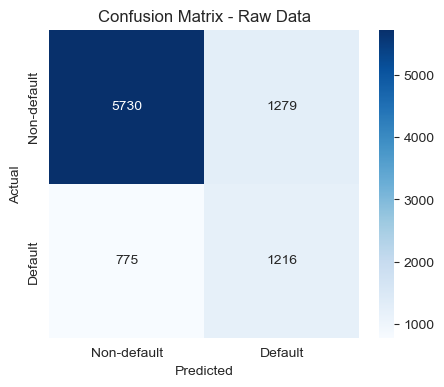

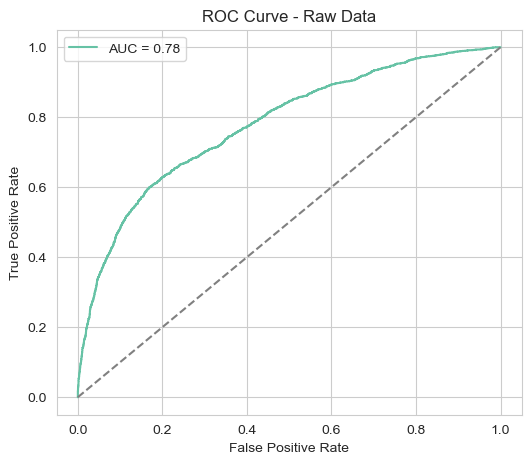

Classification Report - Raw Data:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85      7009
           1       0.49      0.61      0.54      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.71      0.70      9000
weighted avg       0.79      0.77      0.78      9000

Training on Reduced Features (PAY_0, PAY_2, PAY_3)...


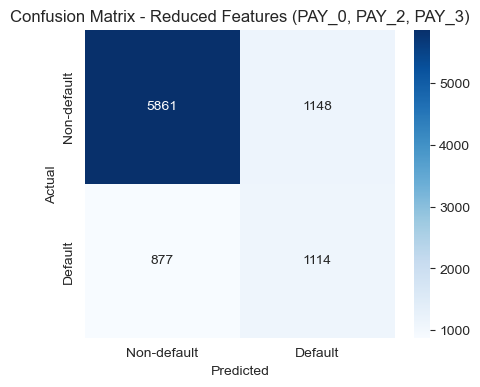

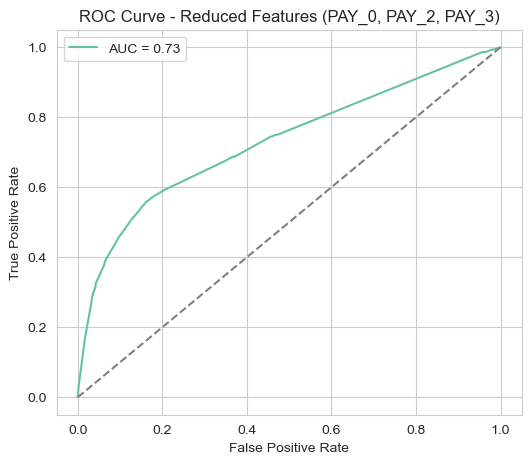

Classification Report - Reduced Features (PAY_0, PAY_2, PAY_3):
              precision    recall  f1-score   support

           0       0.87      0.84      0.85      7009
           1       0.49      0.56      0.52      1991

    accuracy                           0.78      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.78      0.78      9000

Applying SMOTE...


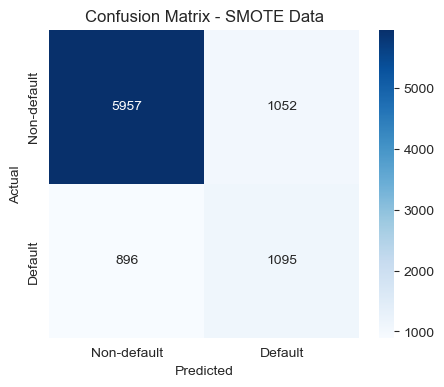

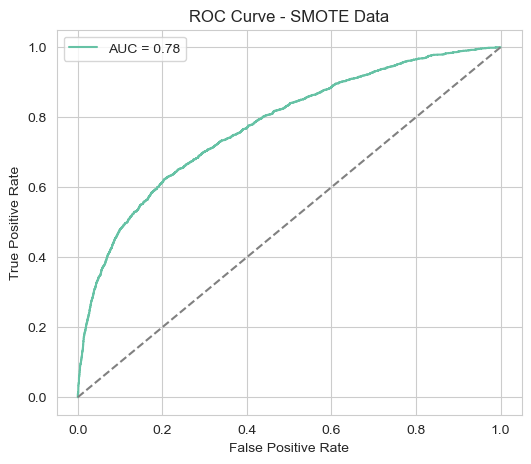

Classification Report - SMOTE Data:
              precision    recall  f1-score   support

           0       0.87      0.85      0.86      7009
           1       0.51      0.55      0.53      1991

    accuracy                           0.78      9000
   macro avg       0.69      0.70      0.69      9000
weighted avg       0.79      0.78      0.79      9000

Applying Under-Sampling...


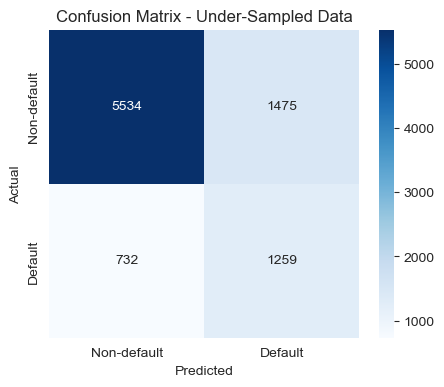

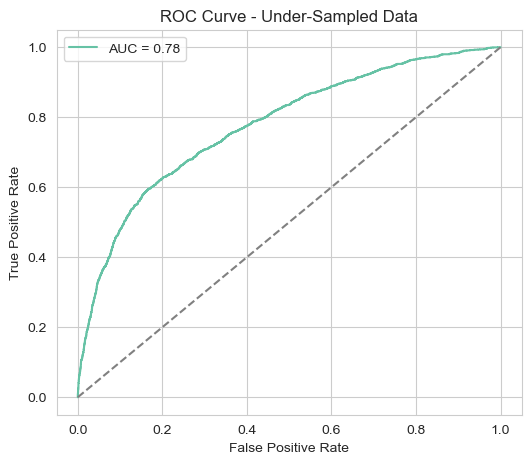

Classification Report - Under-Sampled Data:
              precision    recall  f1-score   support

           0       0.88      0.79      0.83      7009
           1       0.46      0.63      0.53      1991

    accuracy                           0.75      9000
   macro avg       0.67      0.71      0.68      9000
weighted avg       0.79      0.75      0.77      9000

Applying PCA...
Số lượng thành phần chính giữ lại sau PCA: 17


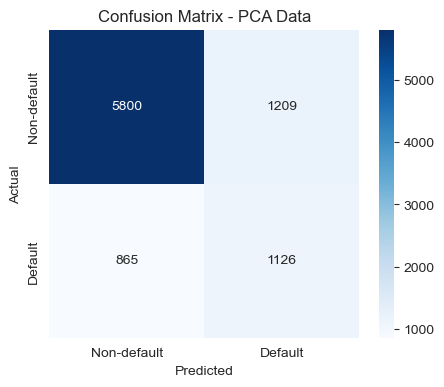

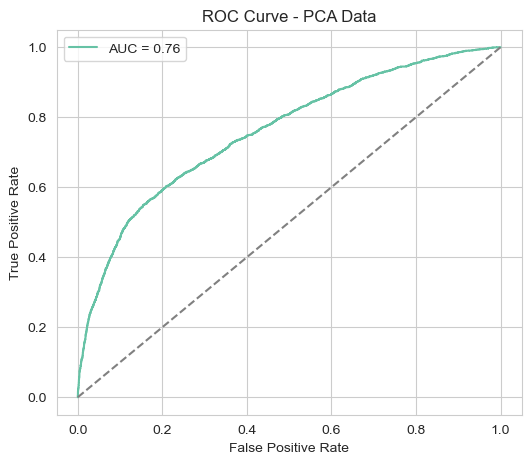

Classification Report - PCA Data:
              precision    recall  f1-score   support

           0       0.87      0.83      0.85      7009
           1       0.48      0.57      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.68      9000
weighted avg       0.78      0.77      0.78      9000


Summary of Results:
                                   Method  Accuracy    Recall  Precision  \
0                                Raw Data  0.771778  0.714134   0.684118   
1  Reduced Features (PAY_0, PAY_2, PAY_3)  0.775000  0.697864   0.681164   
2                              SMOTE Data  0.783556  0.699941   0.689634   
3                      Under-Sampled Data  0.754778  0.710951   0.671838   
4                                PCA Data  0.769556  0.696526   0.676222   

   F1-score       AUC  
0  0.695070  0.778952  
1  0.688280  0.730104  
2  0.694357  0.775443  
3  0.683329  0.776990  
4  0.684449  0.758671  


,Method,Accuracy,Recall,Precision,F1-score,AUC
0,Raw Data,0.771778,0.714134,0.684118,0.695070,0.778952
1,"Reduced Features (PAY_0, PAY_2, PAY_3)",0.775000,0.697864,0.681164,0.688280,0.730104
2,SMOTE Data,0.783556,0.699941,0.689634,0.694357,0.775443
3,Under-Sampled Data,0.754778,0.710951,0.671838,0.683329,0.776990
4,PCA Data,0.769556,0.696526,0.676222,0.684449,0.758671


C:\Users\user\AppData\Local\Temp\ipykernel_13300\3573958079.py:122: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")


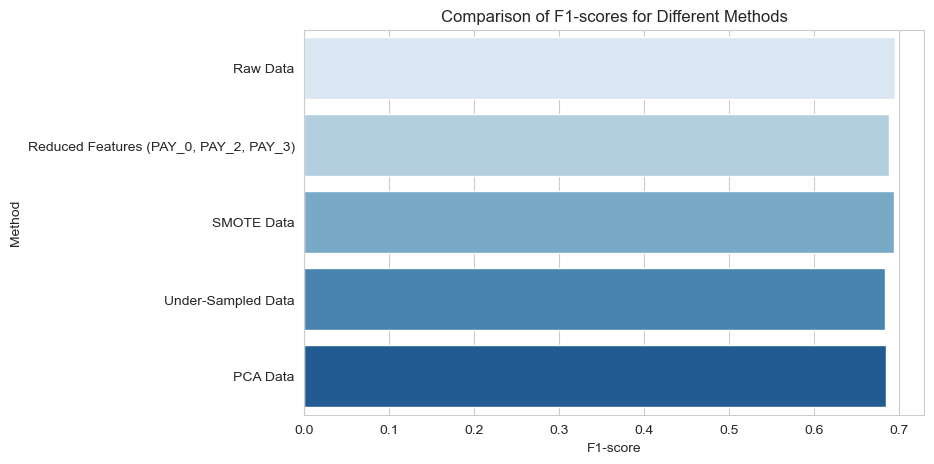

Training Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA  # Thêm PCA
from sklearn.model_selection import train_test_split
import IPython.display as display

# **Khởi tạo DataFrame để lưu kết quả**
results = []

# **Huấn luyện và đánh giá Random Forest**
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = RandomForestClassifier(n_estimators=500, max_depth=10, min_samples_split=200,
                                   max_features='sqrt', class_weight='balanced', random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # **Tính các chỉ số đánh giá**
    accuracy = accuracy_score(y_test, y_pred)

    # **Confusion Matrix**
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-default", "Default"], yticklabels=["Non-default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    # **ROC Curve**
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.show()

    print(f"Classification Report - {title}:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # **Lưu kết quả vào DataFrame**
    results.append({
        "Method": title,
        "Accuracy": accuracy,
        "Recall": report["macro avg"]["recall"],
        "Precision": report["macro avg"]["precision"],
        "F1-score": report["macro avg"]["f1-score"],
        "AUC": roc_auc
    })

    return model

# **1. Random Forest trên dữ liệu gốc**
print("Training on Raw Data...")
rf_raw = train_and_evaluate(X_train, y_train, X_test, y_test, "Raw Data")

# **2. Random Forest với giảm số lượng biến (PAY_0, PAY_2, PAY_3)**
print("Training on Reduced Features (PAY_0, PAY_2, PAY_3)...")
selected_features = ["PAY_0", "PAY_2", "PAY_3"]

# Xác định index của các đặc trưng trong X_train
feature_names = train_data.drop(columns=[target]).columns.tolist()
selected_indices = [feature_names.index(col) for col in selected_features]

# Chọn các cột theo index thay vì tên
X_train_reduced = X_train[:, selected_indices]
X_test_reduced = X_test[:, selected_indices]

# Huấn luyện mô hình với tập Reduced Features
rf_reduced = train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test, "Reduced Features (PAY_0, PAY_2, PAY_3)")


# **3. Random Forest với SMOTE**
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
rf_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, "SMOTE Data")

# **4. Random Forest với Under-Sampling**
print("Applying Under-Sampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
rf_under = train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Under-Sampled Data")

# **5. Random Forest với PCA**
print("Applying PCA...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa dữ liệu trước khi áp dụng PCA
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Số lượng thành phần chính giữ lại sau PCA: {X_train_pca.shape[1]}")
rf_pca = train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test, "PCA Data")

# **Hiển thị bảng tổng hợp kết quả**
results_df = pd.DataFrame(results)

print("\nSummary of Results:")
print(results_df)

# **Hiển thị bảng tổng hợp**
display.display(results_df)

# **Vẽ biểu đồ F1-score**
plt.figure(figsize=(8, 5))
sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")
plt.xlabel("F1-score")
plt.ylabel("Method")
plt.title("Comparison of F1-scores for Different Methods")
plt.show()

print("Training Complete!")

In [ ]:
SMOTE có kết quả tốt nhất: Mô hình SMOTE đạt AUC 0.716255, cao nhất trong các phương pháp, cho thấy khả năng phân biệt tương đối tốt giữa hai lớp. Recall đạt 0.666289 cho thấy khả năng nhận diện khách hàng vỡ nợ khá tốt nhờ cân bằng dữ liệu. Tuy nhiên, Precision thấp (0.621127) cho lớp vỡ nợ dẫn đến nhiều dự đoán sai và F1-score đạt 0.620091 gây nhiều cảnh báo sai, nhưng vẫn đảm bảo sự cân bằng hợp lý giữa Precision và Recall. So với các phương pháp khác, SMOTE giúp cải thiện khả năng phát hiện rủi ro tiềm ẩn tốt hơn.

Under-Sampling: Mặc dù Recall đạt cao, cho thấy khả năng phát hiện khách hàng vỡ nợ ở mức khá, nhưng vẫn bỏ lỡ 676 trường hợp. AUC 0.71 cho thấy khả năng phân biệt không mạnh mẽ. Việc mất dữ liệu quan trọng từ lớp thiểu số có thể dẫn đến quyết định sai lầm trong quản lý rủi ro tín dụng, hiệu suất kém hơn.

PCA: PCA giảm chiều dữ liệu nhưng mất thông tin quan trọng, dẫn đến hiệu suất phân biệt khách hàng vỡ nợ kém hơn.

Reduced Features (PAY_0, PAY_2, PAY_3): Chỉ sử dụng 3 biến đầu vào hạn chế khả năng phát hiện rủi ro. Dù Precision cao nhưng Recall thấp khiến mô hình bỏ sót nhiều trường hợp vỡ nợ.

Raw Data: Dữ liệu thô không xử lý mất cân bằng, dẫn đến kết quả không vượt trội.


SMOTE Data

In [ ]:
!pip install catboost

# CatBoost

Training on Raw Data...


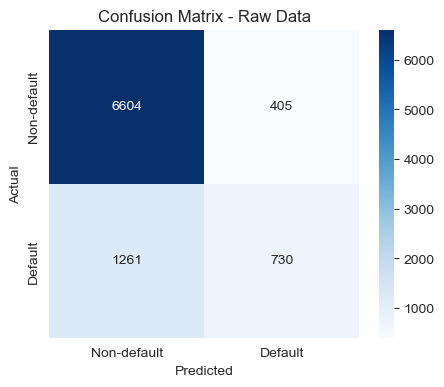

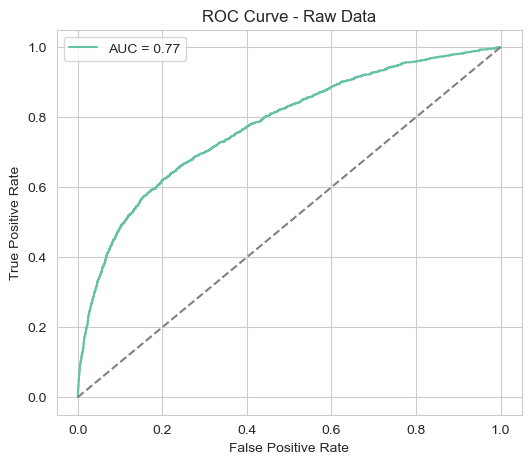

Classification Report - Raw Data:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.37      0.47      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.68      9000
weighted avg       0.80      0.81      0.79      9000

Training on Reduced Features (PAY_0, PAY_2, PAY_3)...


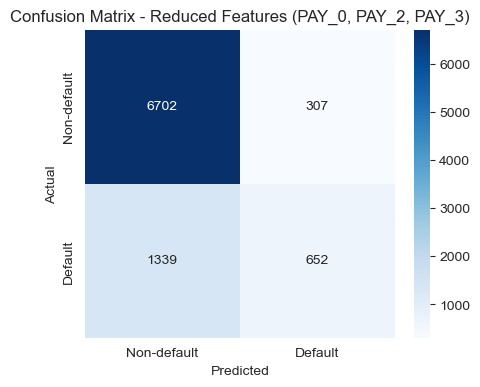

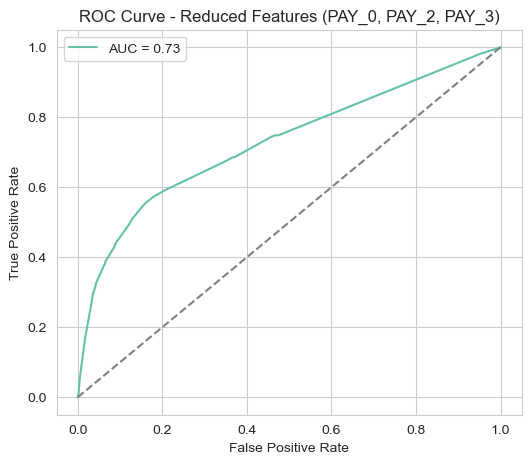

Classification Report - Reduced Features (PAY_0, PAY_2, PAY_3):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.68      0.33      0.44      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000

Applying SMOTE...


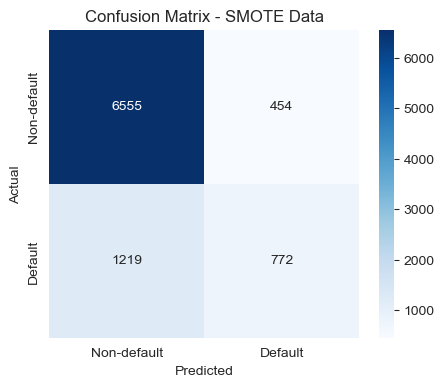

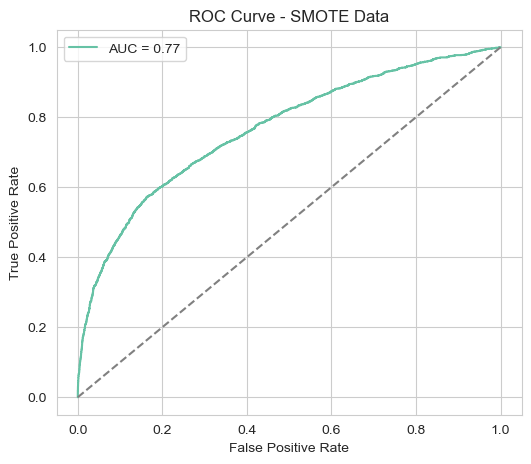

Classification Report - SMOTE Data:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.63      0.39      0.48      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.66      0.68      9000
weighted avg       0.80      0.81      0.80      9000

Applying Under-Sampling...


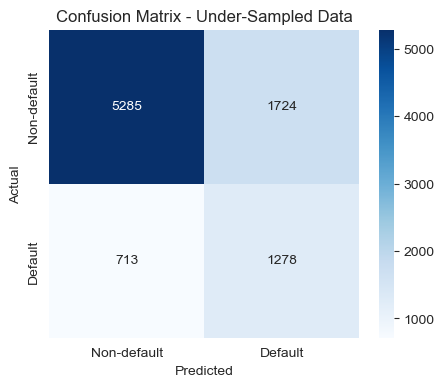

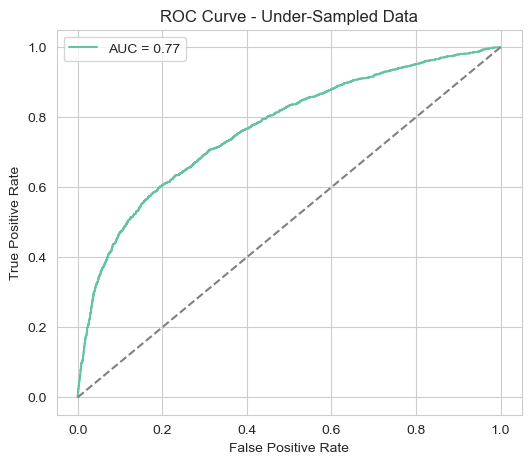

Classification Report - Under-Sampled Data:
              precision    recall  f1-score   support

           0       0.88      0.75      0.81      7009
           1       0.43      0.64      0.51      1991

    accuracy                           0.73      9000
   macro avg       0.65      0.70      0.66      9000
weighted avg       0.78      0.73      0.75      9000

Applying PCA...
Số lượng thành phần chính giữ lại sau PCA: 17


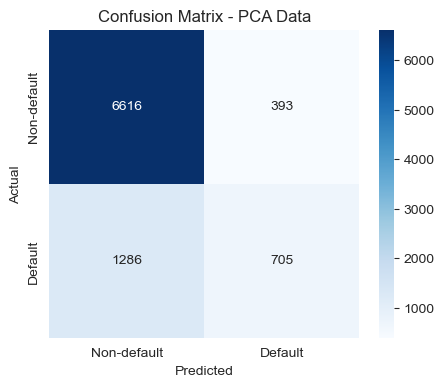

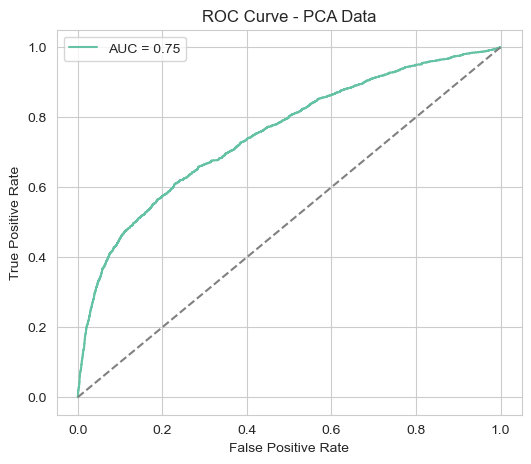

Classification Report - PCA Data:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.64      0.35      0.46      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000


Summary of Results:
                                   Method  Accuracy    Recall  Precision  \
0                                Raw Data  0.814889  0.654434   0.741421   
1  Reduced Features (PAY_0, PAY_2, PAY_3)  0.817111  0.641836   0.756677   
2                              SMOTE Data  0.814111  0.661485   0.736443   
3                      Under-Sampled Data  0.729222  0.697960   0.653422   
4                                PCA Data  0.813444  0.649011   0.739666   

   F1-score       AUC  
0  0.677522  0.774926  
1  0.666333  0.727961  
2  0.683390  0.765778  
3  0.662278  0.767672  
4  0.671928  0.751044  


,Method,Accuracy,Recall,Precision,F1-score,AUC
0,Raw Data,0.814889,0.654434,0.741421,0.677522,0.774926
1,"Reduced Features (PAY_0, PAY_2, PAY_3)",0.817111,0.641836,0.756677,0.666333,0.727961
2,SMOTE Data,0.814111,0.661485,0.736443,0.683390,0.765778
3,Under-Sampled Data,0.729222,0.697960,0.653422,0.662278,0.767672
4,PCA Data,0.813444,0.649011,0.739666,0.671928,0.751044


C:\Users\user\AppData\Local\Temp\ipykernel_13300\2026576091.py:119: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")


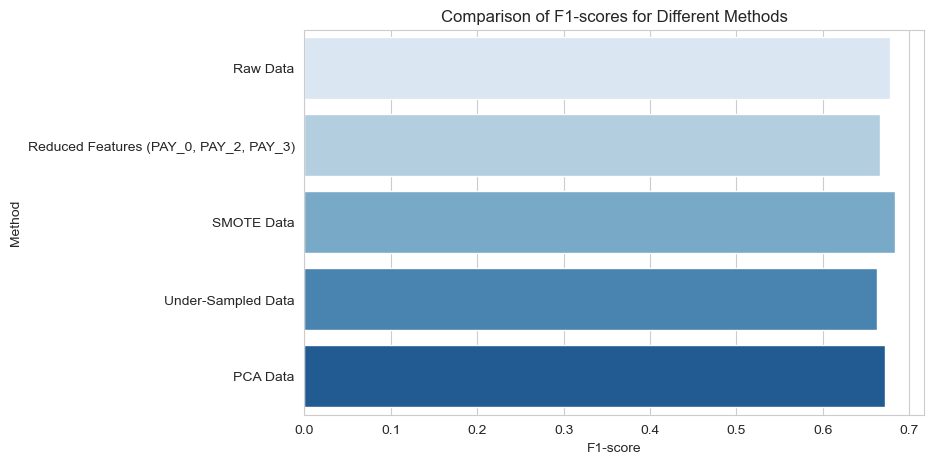

Training Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from catboost import CatBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.decomposition import PCA  # Thêm PCA
from sklearn.model_selection import train_test_split
import IPython.display as display

# **Khởi tạo DataFrame để lưu kết quả**
results = []

# **Huấn luyện và đánh giá CatBoost**
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # **Tính các chỉ số đánh giá**
    accuracy = accuracy_score(y_test, y_pred)

    # **Confusion Matrix**
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-default", "Default"], yticklabels=["Non-default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    # **ROC Curve**
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.show()

    print(f"Classification Report - {title}:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # **Lưu kết quả vào DataFrame**
    results.append({
        "Method": title,
        "Accuracy": accuracy,
        "Recall": report["macro avg"]["recall"],
        "Precision": report["macro avg"]["precision"],
        "F1-score": report["macro avg"]["f1-score"],
        "AUC": roc_auc
    })

    return model

# **1. CatBoost trên dữ liệu gốc**
print("Training on Raw Data...")
catboost_raw = train_and_evaluate(X_train, y_train, X_test, y_test, "Raw Data")

# **2. CatBoost với giảm số lượng biến (PAY_0, PAY_2, PAY_3)**
print("Training on Reduced Features (PAY_0, PAY_2, PAY_3)...")
selected_features = ["PAY_0", "PAY_2", "PAY_3"]

# Xác định index của các đặc trưng trong X_train
feature_names = train_data.drop(columns=[target]).columns.tolist()
selected_indices = [feature_names.index(col) for col in selected_features]

# Chọn các cột theo index thay vì tên
X_train_reduced = X_train[:, selected_indices]
X_test_reduced = X_test[:, selected_indices]

# Huấn luyện mô hình với tập Reduced Features
catboost_reduced = train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test, "Reduced Features (PAY_0, PAY_2, PAY_3)")

# **3. CatBoost với SMOTE**
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
catboost_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, "SMOTE Data")

# **4. CatBoost với Under-Sampling**
print("Applying Under-Sampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
catboost_under = train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Under-Sampled Data")

# **5. CatBoost với PCA**
print("Applying PCA...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa dữ liệu trước khi áp dụng PCA
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Số lượng thành phần chính giữ lại sau PCA: {X_train_pca.shape[1]}")
catboost_pca = train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test, "PCA Data")

# **Hiển thị bảng tổng hợp kết quả**
results_df = pd.DataFrame(results)

print("\nSummary of Results:")
print(results_df)

# **Hiển thị bảng tổng hợp**
display.display(results_df)

# **Vẽ biểu đồ F1-score**
plt.figure(figsize=(8, 5))
sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")
plt.xlabel("F1-score")
plt.ylabel("Method")
plt.title("Comparison of F1-scores for Different Methods")
plt.show()

print("Training Complete!")

SMOTE Data

# SVC

Training on Raw Data...


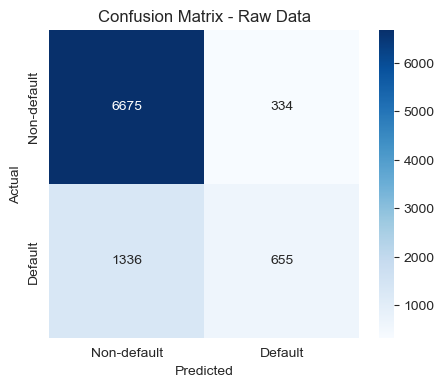

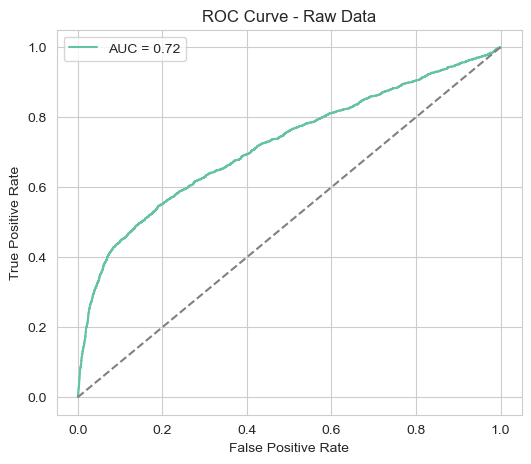

Classification Report - Raw Data:
              precision    recall  f1-score   support

           0       0.83      0.95      0.89      7009
           1       0.66      0.33      0.44      1991

    accuracy                           0.81      9000
   macro avg       0.75      0.64      0.66      9000
weighted avg       0.80      0.81      0.79      9000

Training on Reduced Features (PAY_0, PAY_2, PAY_3)...


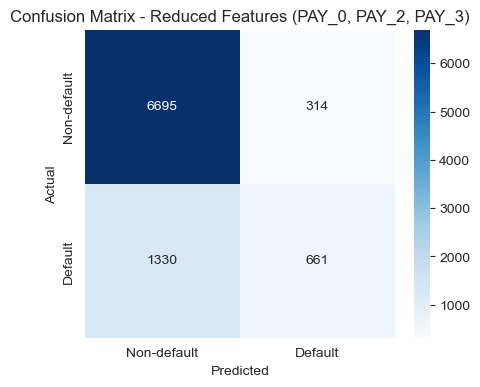

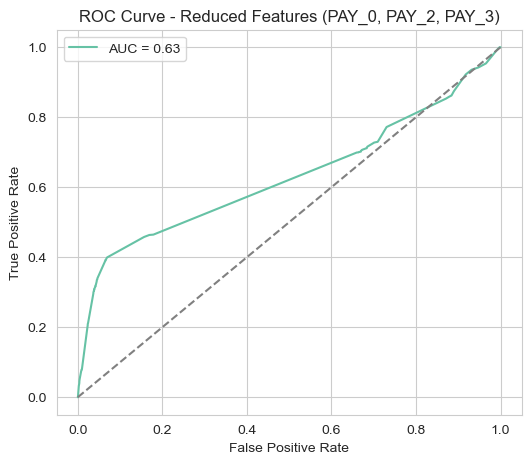

Classification Report - Reduced Features (PAY_0, PAY_2, PAY_3):
              precision    recall  f1-score   support

           0       0.83      0.96      0.89      7009
           1       0.68      0.33      0.45      1991

    accuracy                           0.82      9000
   macro avg       0.76      0.64      0.67      9000
weighted avg       0.80      0.82      0.79      9000

Applying SMOTE...


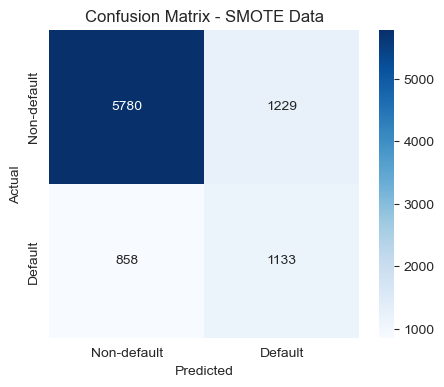

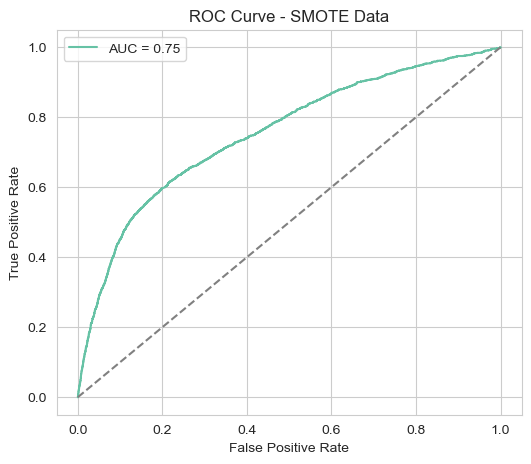

Classification Report - SMOTE Data:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7009
           1       0.48      0.57      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.68      9000
weighted avg       0.78      0.77      0.77      9000

Applying Under-Sampling...


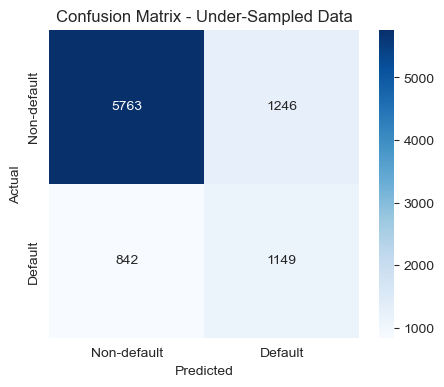

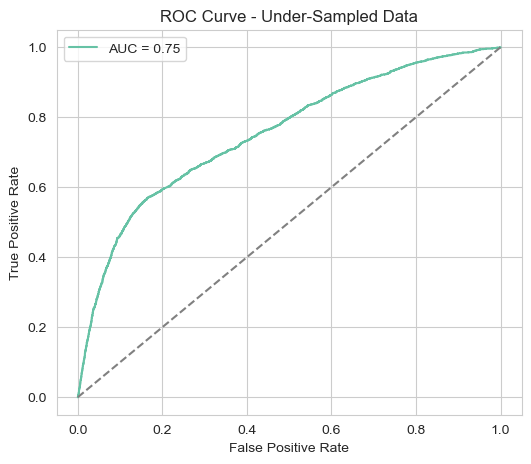

Classification Report - Under-Sampled Data:
              precision    recall  f1-score   support

           0       0.87      0.82      0.85      7009
           1       0.48      0.58      0.52      1991

    accuracy                           0.77      9000
   macro avg       0.68      0.70      0.69      9000
weighted avg       0.79      0.77      0.78      9000

Applying PCA...
Số lượng thành phần chính giữ lại sau PCA: 17


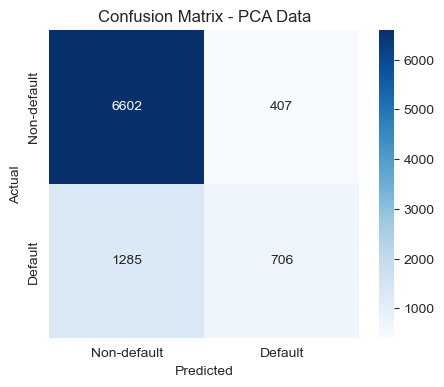

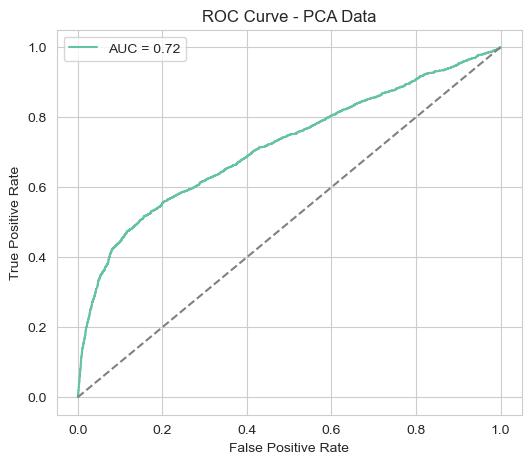

Classification Report - PCA Data:
              precision    recall  f1-score   support

           0       0.84      0.94      0.89      7009
           1       0.63      0.35      0.45      1991

    accuracy                           0.81      9000
   macro avg       0.74      0.65      0.67      9000
weighted avg       0.79      0.81      0.79      9000


Summary of Results:
                                   Method  Accuracy    Recall  Precision  \
0                                Raw Data  0.814444  0.640664   0.747757   
1  Reduced Features (PAY_0, PAY_2, PAY_3)  0.817333  0.643597   0.756108   
2                              SMOTE Data  0.768111  0.696857   0.675211   
3                      Under-Sampled Data  0.768000  0.699663   0.676135   
4                                PCA Data  0.812000  0.648264   0.735698   

   F1-score       AUC  
0  0.664206  0.719500  
1  0.668183  0.630233  
2  0.683817  0.752833  
3  0.685284  0.753754  
4  0.670655  0.715791  


,Method,Accuracy,Recall,Precision,F1-score,AUC
0,Raw Data,0.814444,0.640664,0.747757,0.664206,0.719500
1,"Reduced Features (PAY_0, PAY_2, PAY_3)",0.817333,0.643597,0.756108,0.668183,0.630233
2,SMOTE Data,0.768111,0.696857,0.675211,0.683817,0.752833
3,Under-Sampled Data,0.768000,0.699663,0.676135,0.685284,0.753754
4,PCA Data,0.812000,0.648264,0.735698,0.670655,0.715791


C:\Users\user\AppData\Local\Temp\ipykernel_13300\2796595732.py:110: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")


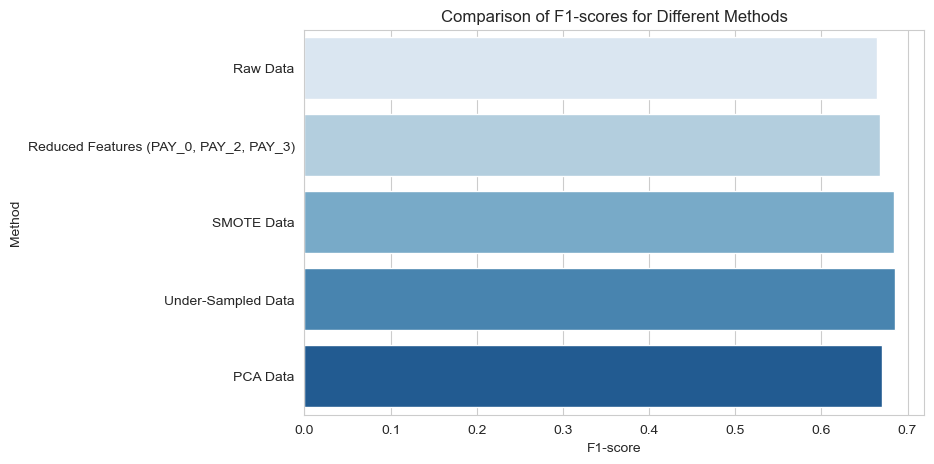

Training Complete!


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, accuracy_score
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import IPython.display as display

# **Khởi tạo DataFrame để lưu kết quả**
results = []

# **Huấn luyện và đánh giá SVC**
def train_and_evaluate(X_train, y_train, X_test, y_test, title):
    model = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)  # SVC với kernel RBF
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1]

    # **Tính các chỉ số đánh giá**
    accuracy = accuracy_score(y_test, y_pred)

    # **Confusion Matrix**
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5, 4))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
                xticklabels=["Non-default", "Default"], yticklabels=["Non-default", "Default"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title(f"Confusion Matrix - {title}")
    plt.show()

    # **ROC Curve**
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.figure(figsize=(6, 5))
    plt.plot(fpr, tpr, label=f"AUC = {roc_auc:.2f}")
    plt.plot([0, 1], [0, 1], linestyle="--", color="gray")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title(f"ROC Curve - {title}")
    plt.legend()
    plt.show()

    print(f"Classification Report - {title}:")
    report = classification_report(y_test, y_pred, output_dict=True)
    print(classification_report(y_test, y_pred))

    # **Lưu kết quả vào DataFrame**
    results.append({
        "Method": title,
        "Accuracy": accuracy,
        "Recall": report["macro avg"]["recall"],
        "Precision": report["macro avg"]["precision"],
        "F1-score": report["macro avg"]["f1-score"],
        "AUC": roc_auc
    })

    return model

# **1. SVC trên dữ liệu gốc**
print("Training on Raw Data...")
svm_raw = train_and_evaluate(X_train, y_train, X_test, y_test, "Raw Data")

# **2. SVC với giảm số lượng biến (PAY_0, PAY_2, PAY_3)**
print("Training on Reduced Features (PAY_0, PAY_2, PAY_3)...")
selected_features = ["PAY_0", "PAY_2", "PAY_3"]
X_train_reduced, X_test_reduced = X_train[:, selected_indices], X_test[:, selected_indices]
svm_reduced = train_and_evaluate(X_train_reduced, y_train, X_test_reduced, y_test, "Reduced Features (PAY_0, PAY_2, PAY_3)")

# **3. SVC với SMOTE**
print("Applying SMOTE...")
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
svm_smote = train_and_evaluate(X_train_smote, y_train_smote, X_test, y_test, "SMOTE Data")

# **4. SVC với Under-Sampling**
print("Applying Under-Sampling...")
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
svm_under = train_and_evaluate(X_train_under, y_train_under, X_test, y_test, "Under-Sampled Data")

# **5. SVC với PCA**
print("Applying PCA...")
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)  # Chuẩn hóa dữ liệu trước khi áp dụng PCA
X_test_scaled = scaler.transform(X_test)

pca = PCA(n_components=0.95)  # Giữ lại 95% phương sai
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

print(f"Số lượng thành phần chính giữ lại sau PCA: {X_train_pca.shape[1]}")
svm_pca = train_and_evaluate(X_train_pca, y_train, X_test_pca, y_test, "PCA Data")

# **Hiển thị bảng tổng hợp kết quả**
results_df = pd.DataFrame(results)

print("\nSummary of Results:")
print(results_df)

# **Hiển thị bảng tổng hợp**
display.display(results_df)

# **Vẽ biểu đồ F1-score**
plt.figure(figsize=(8, 5))
sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")
plt.xlabel("F1-score")
plt.ylabel("Method")
plt.title("Comparison of F1-scores for Different Methods")
plt.show()

print("Training Complete!")

Under-Sampled Data

# So sánh hiệu suất các mô hình

,Method,Accuracy,Recall,Precision,F1-score,AUC
0,Logistic Regression - SMOTE,0.678000,0.663096,0.618984,0.617955,0.718473
1,Decision Tree - PCA,0.715778,0.600690,0.595806,0.597965,0.600690
2,Random Forest - SMOTE,0.802000,0.676903,0.709221,0.689589,0.753795
3,CatBoost - SMOTE,0.814111,0.661485,0.736443,0.683390,0.765778
4,SVC - Under Sample,0.768000,0.699663,0.676135,0.685284,0.753754


C:\Users\user\AppData\Local\Temp\ipykernel_13300\3343953625.py:95: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")


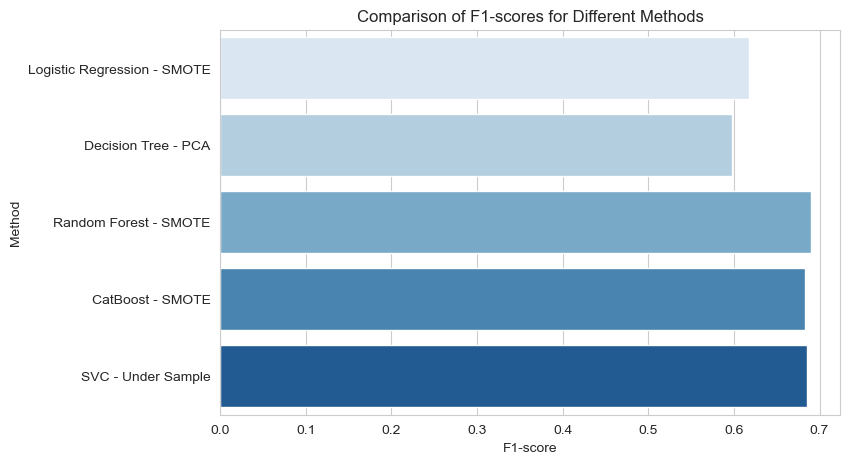

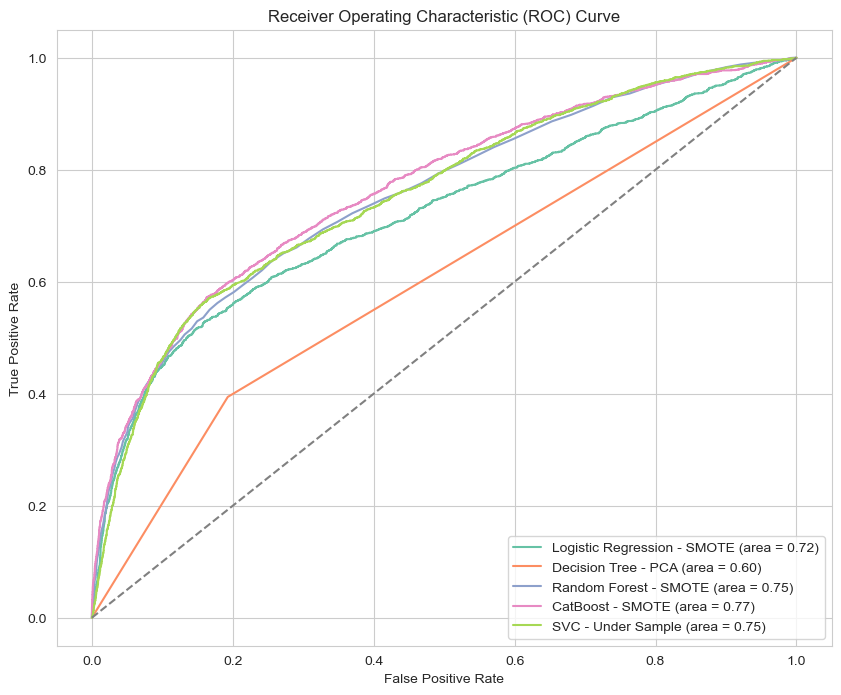

Training Complete!


In [ ]:
# Giả sử bạn đã huấn luyện các mô hình và có kết quả đánh giá
results = []

# Logistic Regression - SMOTE
log_reg = LogisticRegression()
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)
log_reg.fit(X_train_smote, y_train_smote)
y_pred = log_reg.predict(X_test)
y_prob_logreg = log_reg.predict_proba(X_test)[:, 1]  # Xác suất dự đoán cho lớp 1
# Thêm kết quả vào bảng
results.append({
    "Method": "Logistic Regression - SMOTE",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["recall"],
    "Precision": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["precision"],
    "F1-score": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"],
    "AUC": auc(*roc_curve(y_test, y_prob_logreg)[:2])
})

# Decision Tree - PCA
dt = DecisionTreeClassifier(random_state=42)
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)
dt.fit(X_train_pca, y_train)
y_pred = dt.predict(X_test_pca)
y_prob_dt = dt.predict_proba(X_test_pca)[:, 1]
# Thêm kết quả vào bảng
results.append({
    "Method": "Decision Tree - PCA",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["recall"],
    "Precision": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["precision"],
    "F1-score": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"],
    "AUC": auc(*roc_curve(y_test, y_prob_dt)[:2])
})

# Random Forest - SMOTE
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train_smote, y_train_smote)
y_pred = rf.predict(X_test)
y_prob_rf = rf.predict_proba(X_test)[:, 1]
# Thêm kết quả vào bảng
results.append({
    "Method": "Random Forest - SMOTE",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["recall"],
    "Precision": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["precision"],
    "F1-score": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"],
    "AUC": auc(*roc_curve(y_test, y_prob_rf)[:2])
})

# CatBoost - SMOTE
catboost = CatBoostClassifier(iterations=500, learning_rate=0.1, depth=6, verbose=0, random_state=42)
catboost.fit(X_train_smote, y_train_smote)
y_pred = catboost.predict(X_test)
y_prob_catboost = catboost.predict_proba(X_test)[:, 1]
# Thêm kết quả vào bảng
results.append({
    "Method": "CatBoost - SMOTE",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["recall"],
    "Precision": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["precision"],
    "F1-score": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"],
    "AUC": auc(*roc_curve(y_test, y_prob_catboost)[:2])
})

# SVC - Under Sampling
svc = SVC(kernel='rbf', C=1.0, random_state=42, probability=True)
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)
svc.fit(X_train_under, y_train_under)
y_pred = svc.predict(X_test)
y_prob_svc = svc.predict_proba(X_test)[:, 1]
# Thêm kết quả vào bảng
results.append({
    "Method": "SVC - Under Sample",
    "Accuracy": accuracy_score(y_test, y_pred),
    "Recall": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["recall"],
    "Precision": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["precision"],
    "F1-score": classification_report(y_test, y_pred, output_dict=True)["macro avg"]["f1-score"],
    "AUC": auc(*roc_curve(y_test, y_prob_svc)[:2])
})

# Tạo DataFrame tổng hợp
results_df = pd.DataFrame(results)

# Hiển thị bảng kết quả
import IPython.display as display
display.display(results_df)

# Vẽ biểu đồ F1-score
plt.figure(figsize=(8, 5))
sns.barplot(x="F1-score", y="Method", data=results_df, palette="Blues")
plt.xlabel("F1-score")
plt.ylabel("Method")
plt.title("Comparison of F1-scores for Different Methods")
plt.show()

# Vẽ ROC cho tất cả các mô hình
plt.figure(figsize=(10, 8))
models = [
    ('Logistic Regression - SMOTE', y_test, y_prob_logreg),
    ('Decision Tree - PCA', y_test, y_prob_dt),
    ('Random Forest - SMOTE', y_test, y_prob_rf),
    ('CatBoost - SMOTE', y_test, y_prob_catboost),
    ('SVC - Under Sample', y_test, y_prob_svc)
]

for name, y_test, y_prob in models:
    fpr, tpr, _ = roc_curve(y_test, y_prob)
    roc_auc = auc(fpr, tpr)
    plt.plot(fpr, tpr, label=f'{name} (area = {roc_auc:.2f})')

plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

print("Training Complete!")